# Preambule

In [1]:
%%capture
import matplotlib.pyplot as plt
import numpy as np
import cv2

try:
    cv2.setNumThreads(0)
except:
    print ("did not set the number of threads")
    pass

from caiman import movie
# import matplotlib
# matplotlib.get_backend()

import os
# %matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sys import path as syspath
syspath.append("/Users/srdjan/Documents/Physio_Ca/functions/")
from physio_def_1 import *

syspath.append("/Users/srdjan/Seafile/functions/")

from general_functions import autocorr

from matplotlib.colors import LogNorm

import pandas as pd

from itertools import product

from collections import OrderedDict

# from pandas import read_csv, to_numeric

In [2]:
# expDir = "/Volumes/physio/team/slakrupnik/project/experiments/Sandra/2019_10_16/Experiment39a/"

In [3]:
protocol = pd.read_csv("/Users/srdjan/Downloads/Experiment_protocols - List 1.csv")

In [4]:
for col in ["pH","frequency","glucose"]:
    protocol[col+"_"] = pd.to_numeric(protocol[col],errors="coerce")

In [5]:
protocol.treatment = protocol.treatment.astype(str)

In [6]:
for col in ["mouse","sex"]:
    del protocol[col]

In [7]:
df = protocol.query("glucose_==8 and treatment=='nan' and resolution!='line scan'")
df = df[["leica" in m.lower() for m in df.microscope]].copy()
for k in ["resolution","frequency","frequency_","magnification",
#           "treatment"
         ]:
    del df[k]

In [8]:
for ix,row in df.iterrows():
#     try:
        exp, ser = row.experiment.split("_")
        serDir = f"/Volumes/physio/team/slakrupnik/project/experiments/Sandra/{row.date}/{exp}/"
        if os.path.isdir(serDir):
            fs = [f for f in os.listdir(serDir) if ser in f and "txt" in f]
            assert len(fs)==1
            f = fs[0]
            add = pd.read_csv(serDir+f)
            for k in add.columns:
                df.loc[ix,k] = add[k][0]
            df.loc[ix,"filename"] = f.split(".")[0]
#     except:
#         pass

In [9]:
df["Tmax"] = df["T"]/df.freq

In [10]:
tmpdf = df.query("freq>12")
tmpdf = tmpdf.sort_values("Tmax",ascending=False)

In [11]:
tmpdf.query("microscope=='Leica upright'")

date               experiment     microscope   pH glucose  \
207  2019_10_15  Experiment38a_Series016  Leica upright  7.4       8   
236  2019_10_16  Experiment39a_Series034  Leica upright  7.7       8   
228  2019_10_16  Experiment39a_Series022  Leica upright  7.1       8   
232  2019_10_16  Experiment39a_Series029  Leica upright  7.4       8   
217  2019_10_15  Experiment38b_Series043  Leica upright  7.1       8   
219  2019_10_15  Experiment38b_Series045  Leica upright  7.7       8   
209  2019_10_15  Experiment38a_Series019  Leica upright  7.1       8   
226  2019_10_16  Experiment39a_Series020  Leica upright  7.4       8   
215  2019_10_15  Experiment38b_Series041  Leica upright  7.4       8   
211  2019_10_15  Experiment38a_Series021  Leica upright  7.7       8   
234  2019_10_16  Experiment39a_Series031  Leica upright  7.1       8   
230  2019_10_16  Experiment39a_Series024  Leica upright  7.7       8   

    treatment comments  Slice number  pH_  glucose_        T      X      Y  \
207       nan      NaN           2.0  7.4       8.0  30304.0  128.0  128.0   
236       nan      NaN           4.0  7.7       8.0  26626.0  128.0  128.0   
228       nan      NaN           3.0  7.1       8.0  26300.0  128.0  128.0   
232       nan      NaN           4.0  7.4       8.0  26122.0  128.0  128.0   
217       nan      NaN           6.0  7.1       8.0  25895.0  128.0  128.0   
219       nan      NaN           6.0  7.7       8.0  25619.0  128.0  128.0   
209       nan      NaN           2.0  7.1       8.0  25581.0  128.0  128.0   
226       nan      NaN           3.0  7.4       8.0  25552.0  128.0  128.0   
215       nan      NaN           6.0  7.4       8.0  25488.0  128.0  128.0   
211       nan      NaN           2.0  7.7       8.0  25431.0  128.0  128.0   
234       nan      NaN           4.0  7.1       8.0  25407.0  128.0  128.0   
230       nan      NaN           3.0  7.7       8.0  24580.0  128.0  128.0   

          freq    pxSize pxUnit                    filename  Unnamed: 0  \
207  84.310130  2.137757     µm   Experiment38a_7_Series016         NaN   
236  84.299546  2.446350     µm  Experiment39a_20_Series034         NaN   
228  84.278971  3.418688     µm  Experiment39a_11_Series022         NaN   
232  84.300177  2.446350     µm  Experiment39a_16_Series029         NaN   
217  84.273357  3.418688     µm  Experiment38b_13_Series043         0.0   
219  84.275004  3.418688     µm  Experiment38b_15_Series045         0.0   
209  84.306417  2.137757     µm  Experiment38a_10_Series019         NaN   
226  84.280281  3.418688     µm   Experiment39a_9_Series020         NaN   
215  84.267360  3.418688     µm  Experiment38b_11_Series041         0.0   
211  84.305795  2.137757     µm  Experiment38a_12_Series021         NaN   
234  84.299451  2.446350     µm  Experiment39a_18_Series031         NaN   
230  84.278273  3.418688     µm  Experiment39a_13_Series024         NaN   

           Tmax  
207  359.434861  
236  315.849862  
228  312.058866  
232  309.868863  
217  307.273865  
219  303.992865  
209  303.428861  
226  303.178865  
215  302.465867  
211  301.651861  
234  301.389863  
230  291.652866

In [12]:
# row = tmpdf.iloc[0]
row = tmpdf.loc[207] #no waves
# row = tmpdf.loc[186] #waves
# row = tmpdf.loc[177] #waves
# row = tmpdf.loc[189] #waves
# row = tmpdf.loc[]

pd.DataFrame(row).T

date               experiment     microscope   pH glucose  \
207  2019_10_15  Experiment38a_Series016  Leica upright  7.4       8   

    treatment comments Slice number  pH_ glucose_      T    X    Y     freq  \
207       nan      NaN            2  7.4        8  30304  128  128  84.3101   

      pxSize pxUnit                   filename Unnamed: 0     Tmax  
207  2.13776     µm  Experiment38a_7_Series016        NaN  359.435

# Importing

In [13]:
npzFile = f"/Volumes/physio/team/slakrupnik/project/experiments/Sandra/{row.date}/{row.filename.split('_')[0]}/{row.filename}.npz"

In [14]:
metadata = pd.read_csv(npzFile.replace("npz","txt")).loc[0]

In [15]:
metadata

T           30304
X             128
Y             128
freq      84.3101
pxSize    2.13776
pxUnit         µm
Name: 0, dtype: object

In [16]:
metadata["T"]/metadata.freq/60

5.99058102177609

In [17]:
npzData = np.load(npzFile)
orig_images = npzData["data"]
time = npzData["time"]
m_orig = movie(orig_images)
m_orig = m_orig.astype(float)
m_orig.fr = metadata.freq
print (time.max()/60)
allTrace = m_orig.mean((1,2))
Nsatur = np.sum(m_orig>m_orig.max()-1, axis=(1,2))

5.990383338928223


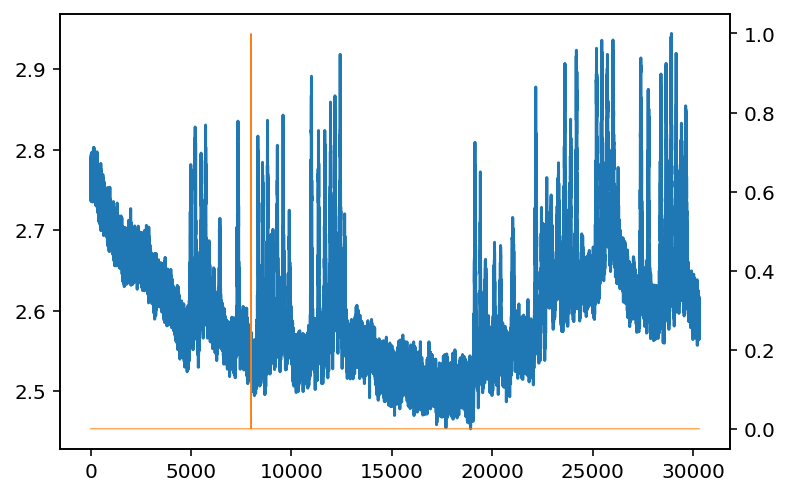

In [18]:
plt.plot(allTrace)
plt.twinx()
plt.plot(Nsatur,"C1",lw=.5)

In [19]:
# check if there are waves
# m_orig[:1000].play(fr=80, magnification=4)

In [20]:
# check if there are waves in the back
# m_orig[-1000:].play(fr=80, magnification=4)

# analysis

In [22]:
from numeric import runningAverage, runningStd, percFilter, lowPass, getInterestingROIcenters
from matplotlib.colors import LogNorm
from collections import Counter

### average to save time and memory, especially if there are waves

In [25]:
newFreq = 30
tWin = int(np.ceil(m_orig.fr/newFreq))
newFreq = m_orig.fr/tWin
newFreq,tWin

(28.103376774902785, 3)

In [26]:
print("New period will be %.1fms"%(1000./newFreq))

New period will be 35.6ms


In [27]:
m_resized = m_orig.resize(1,1,newFreq/m_orig.fr)*tWin

In [28]:
# m_resized.play(fr=40,magnification=4)

In [29]:
# m_resized[::-1].play(fr=40,magnification=4)

In [30]:
m_orig = m_resized.copy()
del m_resized

In [31]:
# m_orig.play(fr=400,magnification=2)

## continue

In [32]:
meanImg = m_orig.mean(0)
stdImg  = m_orig.std (0)

In [55]:
roiCenters = getInterestingROIcenters(
    cv2.GaussianBlur(stdImg,(5,5),0),
    Nsample=10000,
    exponent=3,
    bandwidth=10,
    n_jobs=6,
)

In [33]:
%%capture
cc = m_orig.local_correlations(eight_neighbours=True,swap_dim=False)

In [64]:
time = np.arange(len(m_orig))/m_orig.fr

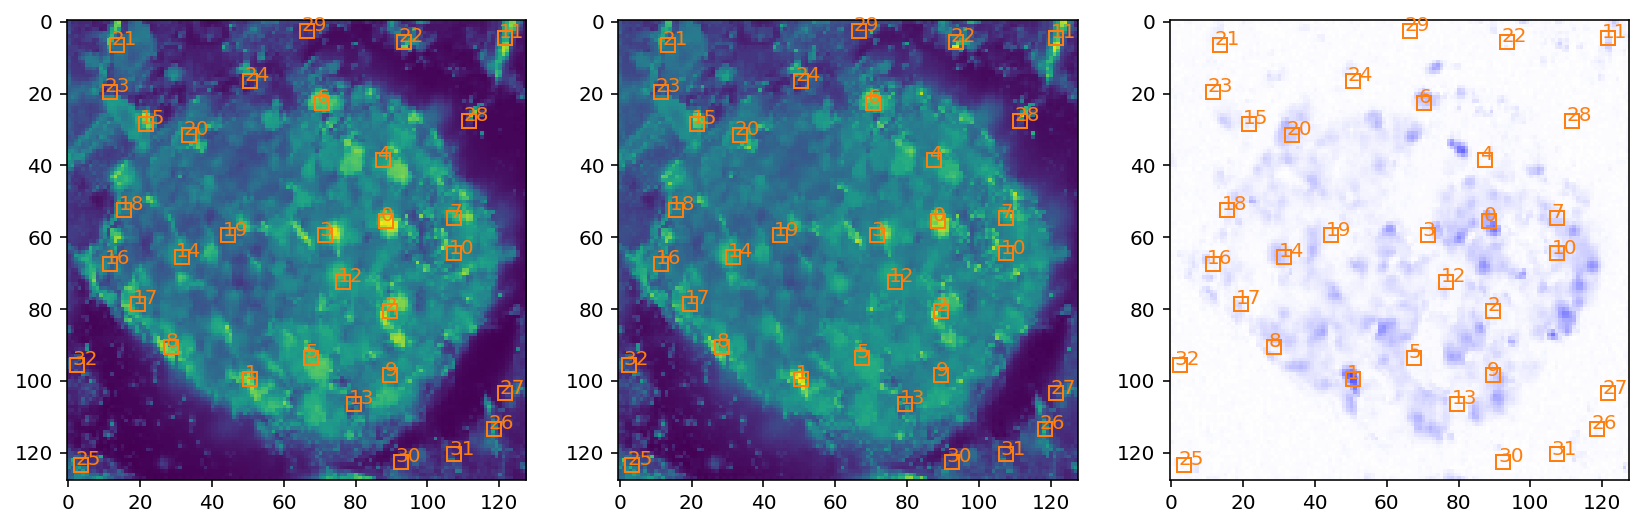

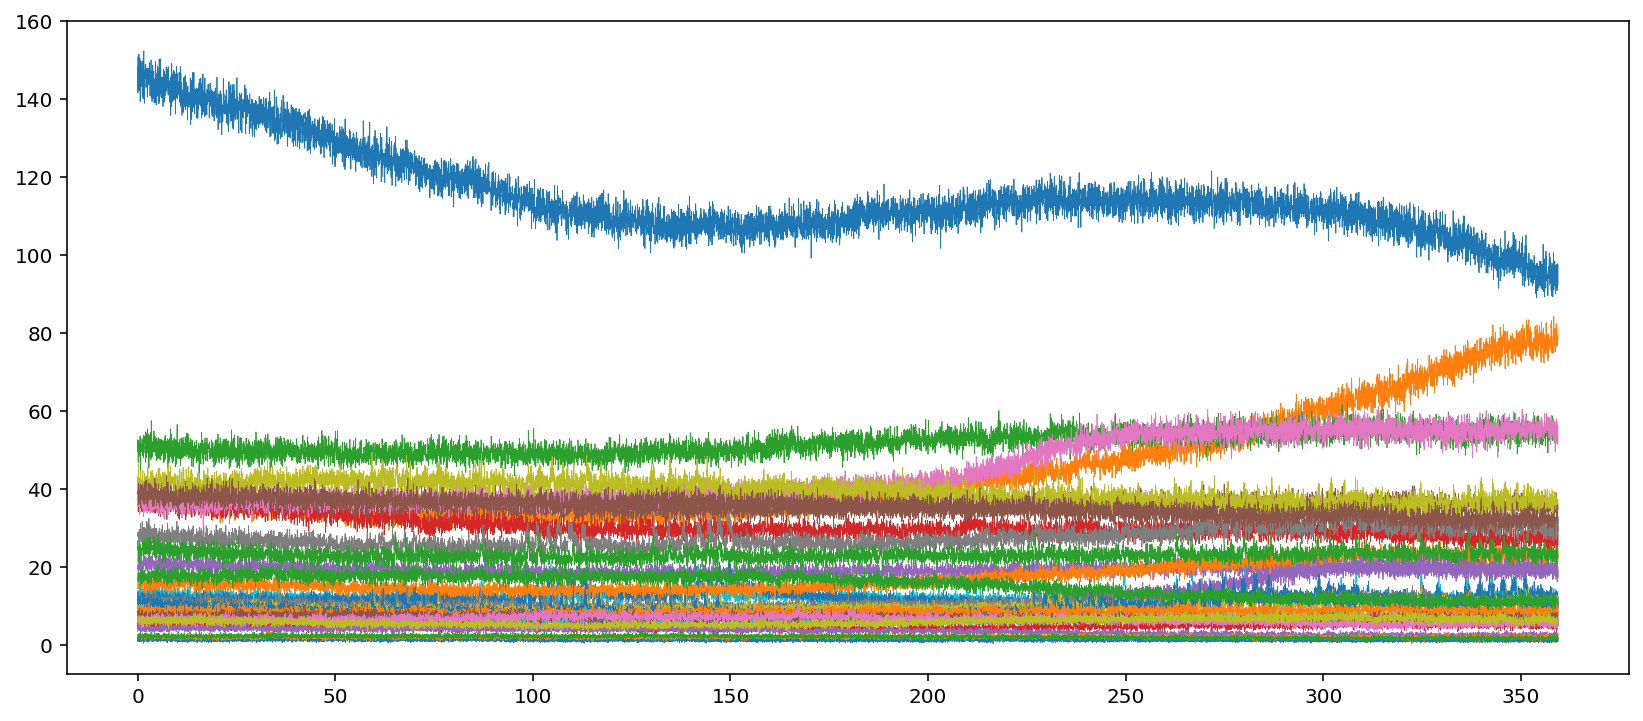

In [67]:
fig, axs = plt.subplots(1,3,figsize=(14,5))
axs[0].imshow(1+meanImg.T, norm=LogNorm())
axs[1].imshow(stdImg.T, norm=LogNorm())
try:
    axs[2].imshow(cc.T, cmap="bwr_r", vmin=-1,vmax=1)
except: pass

pxWin = 4
pxOrigins = np.round(roiCenters[::-1]-pxWin/2).astype(int)
pxOrigins[0] = np.clip(pxOrigins[0],0,metadata.X-pxWin)
pxOrigins[1] = np.clip(pxOrigins[1],0,metadata.Y-pxWin)
pxOrigins = pxOrigins.T
# iis = np.argsort([stdImg[x:x+pxWin,y:y+pxWin].mean() for x,y in pxOrigins])[::-1]
# pxOrigins = pxOrigins[iis][:5]
for ax in axs:
    addRoisToImage(pxOrigins,pxWin,label=True,ax=ax)
roiTraces = getRoiProfiles(pxOrigins,pxWin,image_=m_orig)
plt.figure(figsize=(14,6))
for roi in roiTraces:
    x = roiTraces[roi]
    plt.plot(time,x, lw=.4)

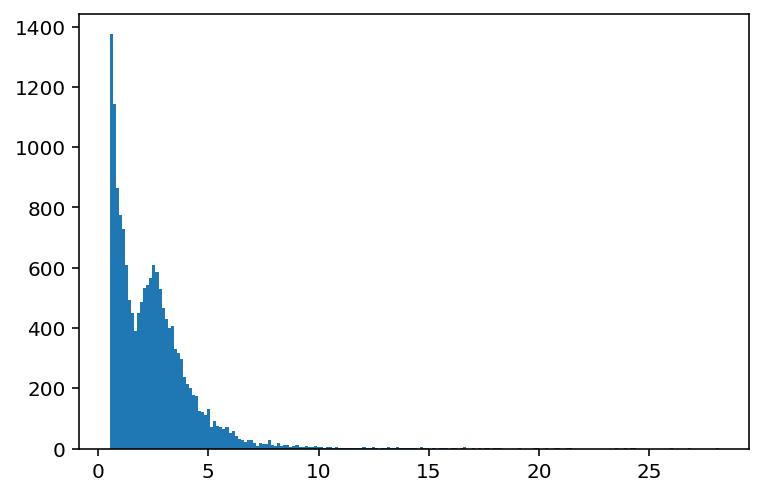

In [68]:
plt.hist(stdImg.flatten(),200);

## Separate into slow and fast component (filtered and diff-movie)

### figure out the parameters

#### should I blur?

In [49]:
# n,s = 3,.35
# z = np.zeros((5,5))
# z[len(z)//2,len(z)//2] = 1
# zb  = cv2.GaussianBlur(z,ksize=(n,n),sigmaX=s,sigmaY=s)
# zb1 = cv2.GaussianBlur(z,ksize=(n,1),sigmaX=s,sigmaY=s)
# with np.printoptions(precision=3, suppress=True):
#     print (zb)
#     print (zb1)


In [50]:
# with np.printoptions(precision=4, suppress=True):
#     print (cv2.getGaussianKernel(3,.35)*100)

In [51]:
# m_blurred = m_orig.copy()
# # m_blurred = np.zeros((10,5,5))
# # m_blurred[4,3,3] = 1
# # blur in time
# nt,st = 3, .4
# m_blurred = movie(cv2.GaussianBlur(
#     m_blurred.reshape((len(m_blurred),-1)),ksize=(nt,1),sigmaX=st, sigmaY=0
# ).reshape(m_blurred.shape))
# # # blur in space
# m_blurred.gaussian_blur_2D(n,n,s,s);


In [52]:
# i,j = 2,11
# for x in [m_orig[:,i,j],m_blurred[:,i,j]]:
#     plt.plot(sorted(x),np.linspace(0,1,len(x)))

In [70]:
# movie(np.concatenate([
#     m_orig,
#     np.ones_like(m_orig[:,:2,:])*m_orig.max(),
#     m_blurred,ii
# ],axis=1)).play(magnification=3, fr=100)

#### continue

In [69]:
# dt = .333
ironScale = 2.5
wIron = int(ironScale*m_orig.fr)
if wIron%2==0:
    wIron += 1

print(wIron)

filterPars = (wIron,wIron,10,1)

71


In [70]:
# %matplotlib notebook

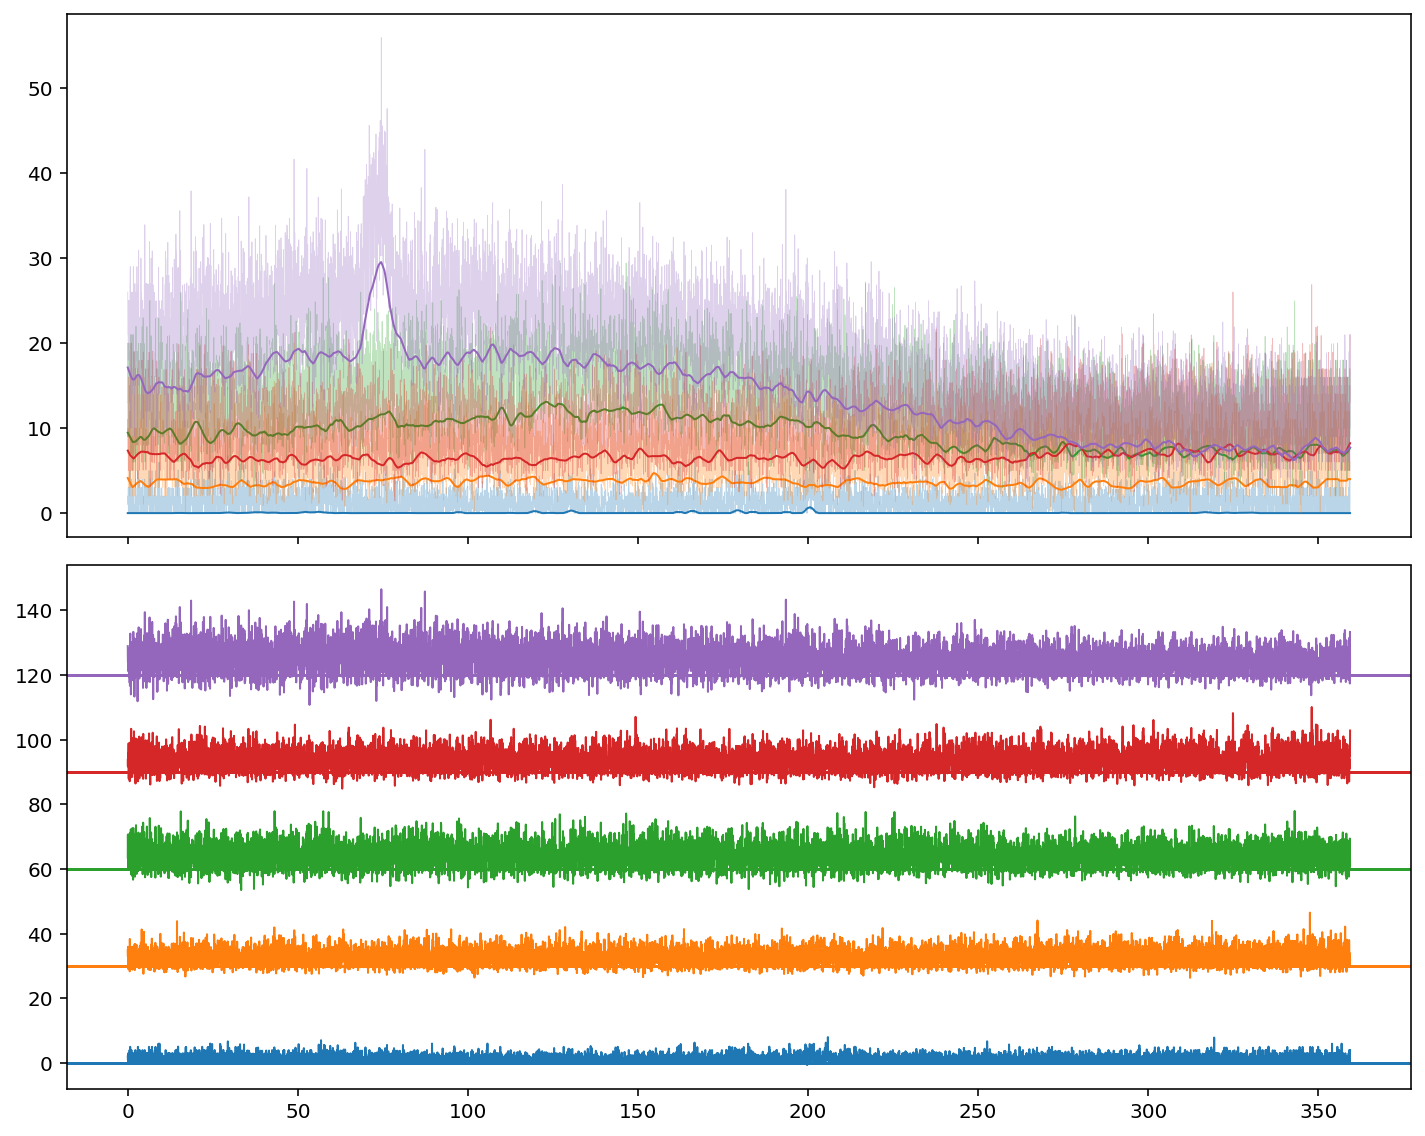

In [72]:
# %%capture
plt.close()
fig, axs = plt.subplots(2,1,figsize=(10,8), sharex=True)
ia = 0
for roi in range(10,15):
    np.random.seed(roi)
    i,j = np.random.choice(stdImg.shape[0],size=2)
    x = m_orig[:,i,j]
#     if np.diff(np.percentile(x,[1,99]))[0]<20: continue
    axs[0].plot(time,x,c="C%i"%roi,lw=.4,alpha = .3)
    xf = lowPass(x,*filterPars)
    axs[0].plot(time,xf,label=roi,c="C%i"%roi,lw=1)
    yoffset = 30*ia
    axs[1].plot(time,x-xf+yoffset,label=roi,c="C%i"%roi,lw=1)
    axs[1].axhline(yoffset,color="C%i"%roi)
    ia += 1
fig.tight_layout()

In [73]:
filteredMovie = np.nan*np.ones_like(m_orig,dtype=np.float32)

In [74]:
np.isfinite(filteredMovie[0]).mean()

movie(0.)

In [ ]:
for i,j in product(range(metadata.X),range(metadata.Y)):
# for i,j in zip(*np.where(stdImg>0)):
    if np.isfinite(filteredMovie[:,i,j]).any(): continue
    filteredMovie[:,i,j] = lowPass(m_orig[:,i,j],*filterPars)

In [ ]:
assert filteredMovie.min()>-1

In [70]:
filteredMovie.min()

movie(0., dtype=float32)

In [71]:
filteredMovie = np.maximum(filteredMovie,0)

In [146]:
# PredictedSigmas = np.zeros_like(meanImg)
# PredictedLocs   = np.zeros_like(meanImg)
# # for i,j in product(np.arange(metadata.X),np.arange(metadata.Y)):
# for i,j in np.array(np.where(np.isfinite(filteredMovie[0]))).T:
#     lc,sg = predictLocSd(diffMovie[:,i,j])
# #     diffMovie[:,i,j] -= lc
# #     filteredMovie[:,i,j] += lc
#     PredictedSigmas[i,j] = sg
#     PredictedLocs  [i,j] = lc

fit mean from percentile

In [73]:
%matplotlib notebook

<IPython.core.display.Javascript object>


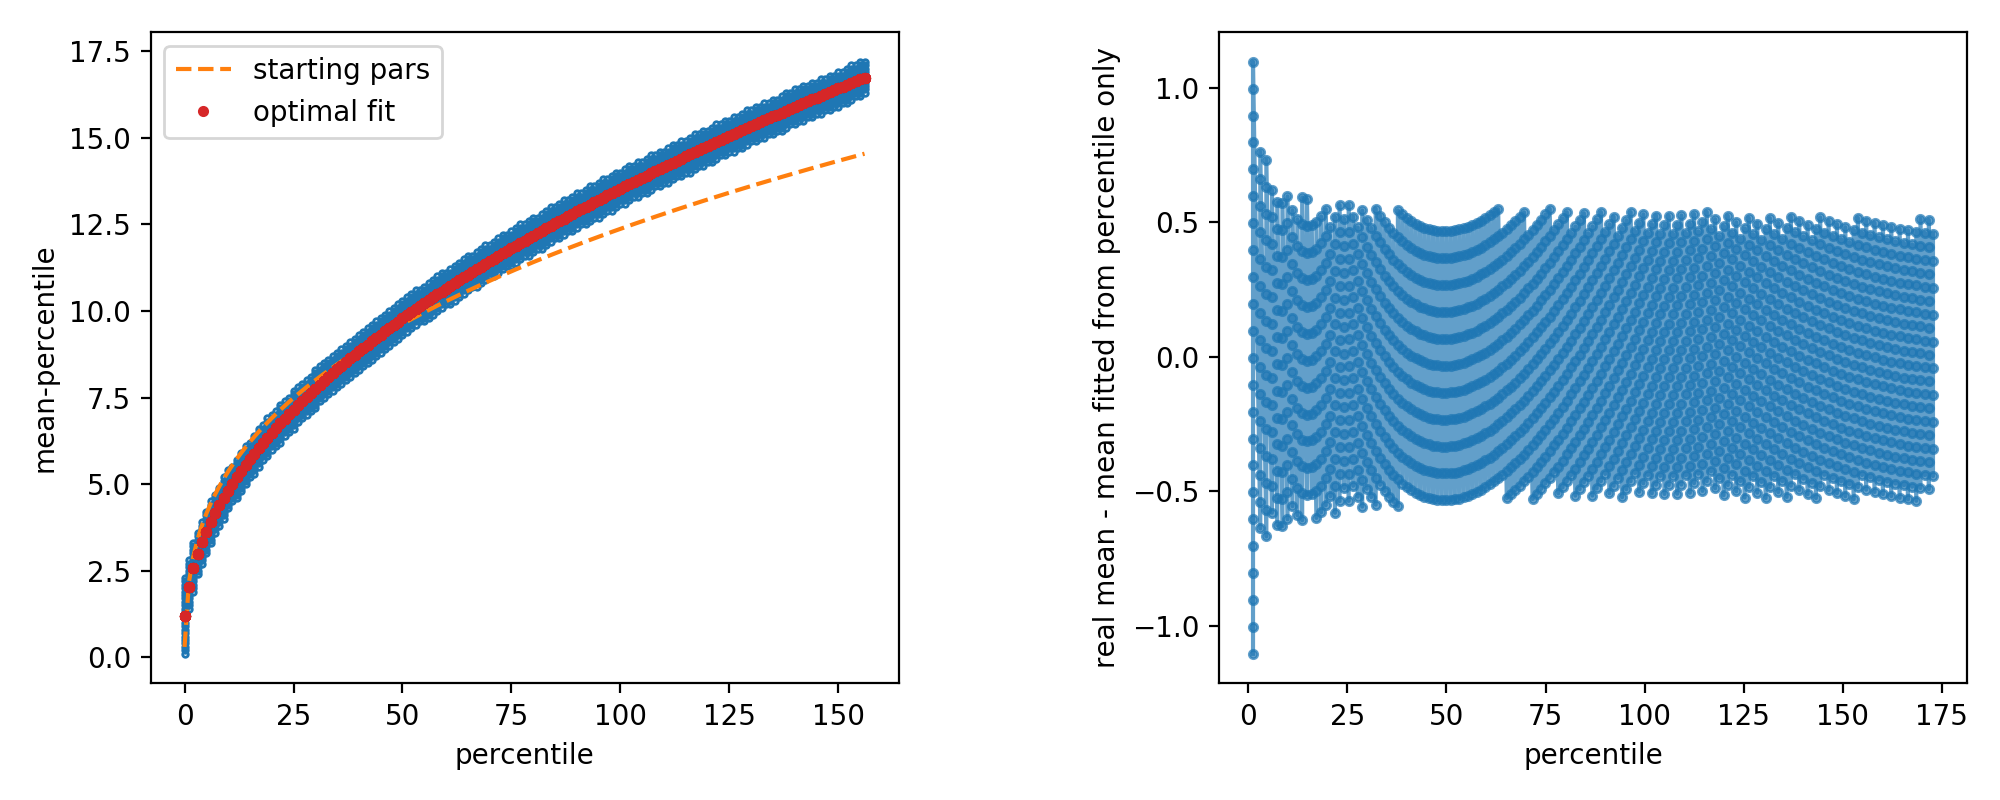

In [74]:
fig, axs = plt.subplots(1,2,figsize=(10,4))

mus = np.arange(0.1,filteredMovie.max(),.1)
percs = dst.poisson.ppf(filterPars[2]/100,mu=mus)
axs[0].plot(percs,mus-percs,".",ms=4,mfc="none")
axs[0].set_xlabel("percentile")
axs[0].set_ylabel("mean-percentile")
def tmpf(xi,a,b,c,d): return a*xi/(1+xi/b)**c+d
p0 = (4.7,.3,.63,.3)
axs[0].plot(percs,tmpf(percs,*p0),label="starting pars",ls="--")
p_opt = curve_fit(tmpf,percs,mus-percs,p0, maxfev=10000)[0]
axs[0].plot([])
axs[0].plot(percs,tmpf(percs,*p_opt),".",label="optimal fit")
axs[0].legend()

axs[1].set_xlabel("percentile")
axs[1].set_ylabel("real mean - mean fitted from percentile only")
def pc2meanF(pcs_):
    return pcs_+tmpf(pcs_,*p_opt)
# axs[1].plot(mus, pc2meanF(percs), ".-",alpha = .7)
axs[1].plot(pc2meanF(percs),mus-pc2meanF(percs),".-",alpha = .7)
fig.tight_layout(w_pad=7)
# plt.xscale("log")
# plt.yscale("log")

In [82]:
shiftFiltered = pc2meanF(filteredMovie)

<IPython.core.display.Javascript object>


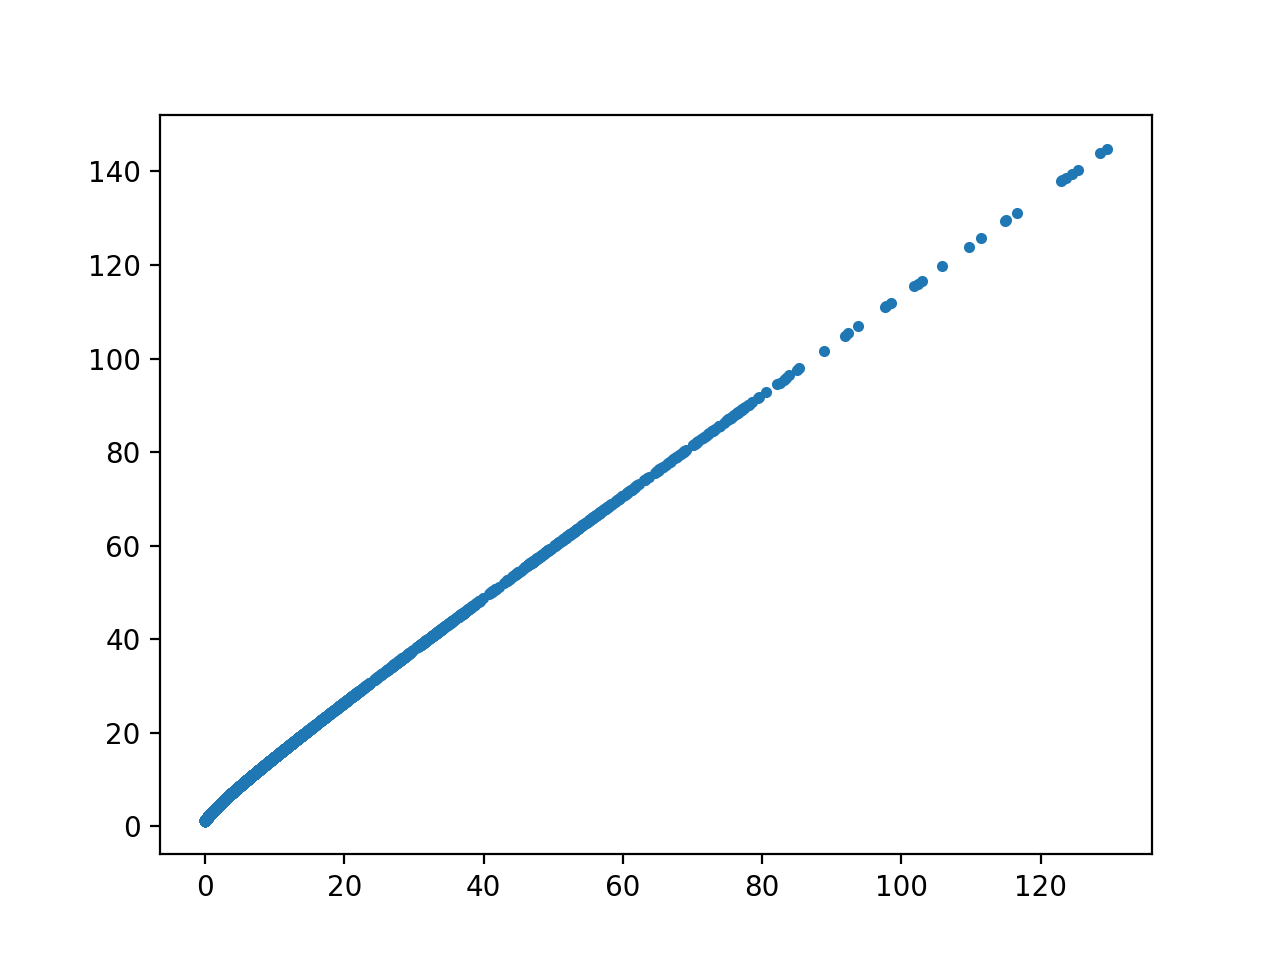

In [112]:
plt.plot(
    filteredMovie[::100,::10,::10].flatten(),
    shiftFiltered[::100,::10,::10].flatten(),
    "."
        )

<IPython.core.display.Javascript object>


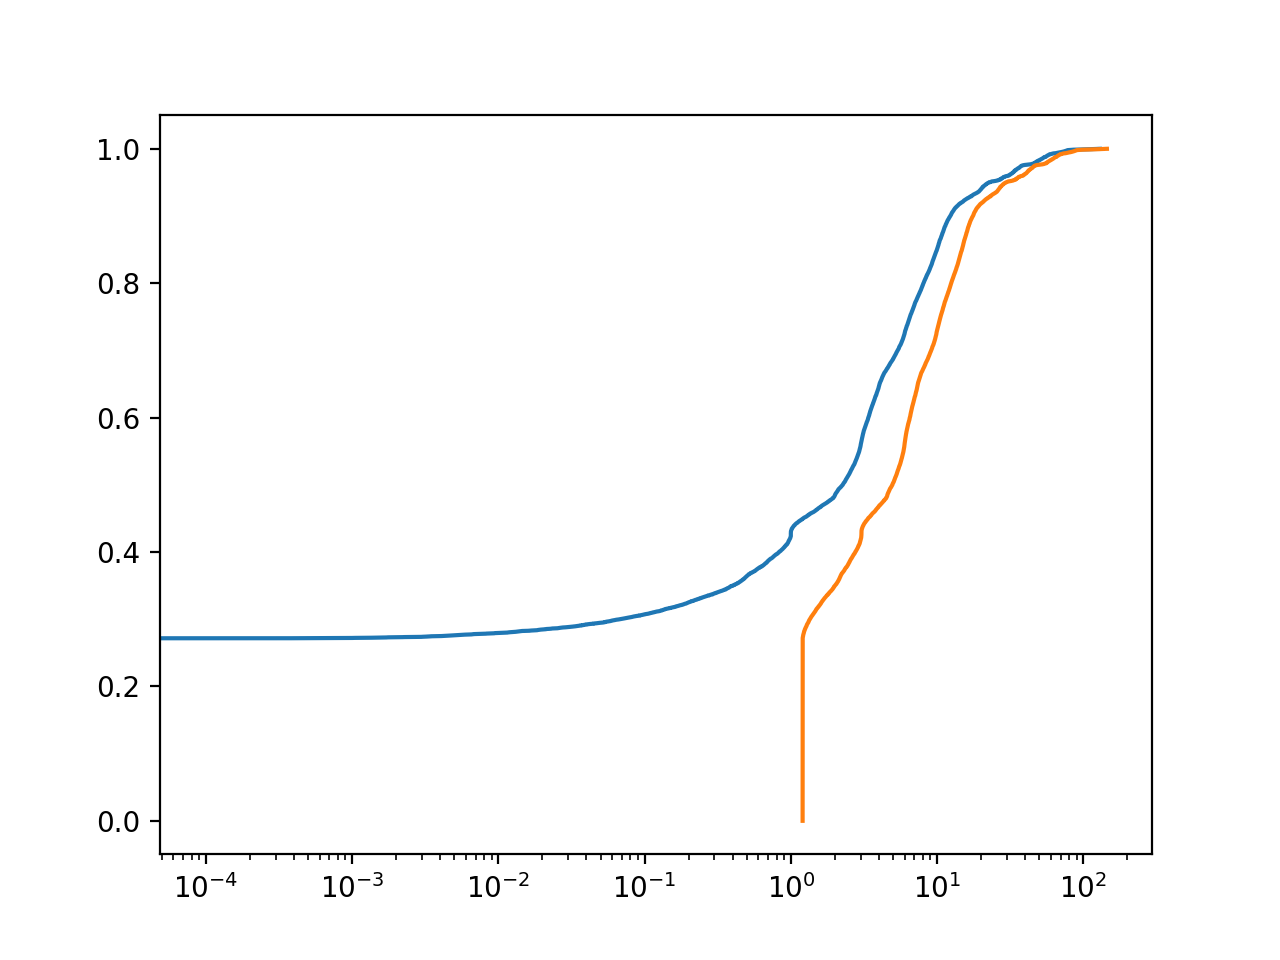

In [83]:
for m in [filteredMovie, shiftFiltered]:
    x = m[::100,::10,::10].flatten()
    plt.plot(sorted(x), np.linspace(0,1,len(x)))
plt.xscale("log")

In [84]:
%matplotlib inline

In [698]:
# filteredMovie.play(fr=30, magnification=4,do_loop=True, plot_text=True)
# filteredMovie.resize(1,1,4./wIron).play(fr=30, magnification=4,do_loop=True, plot_text=True)

In [85]:
diffMovie = m_orig-shiftFiltered

In [86]:
medians = np.median(diffMovie,0)

In [87]:
medians.min(), medians.max()

(movie(-5.68457723), movie(1.29830736))

In [88]:
%matplotlib notebook

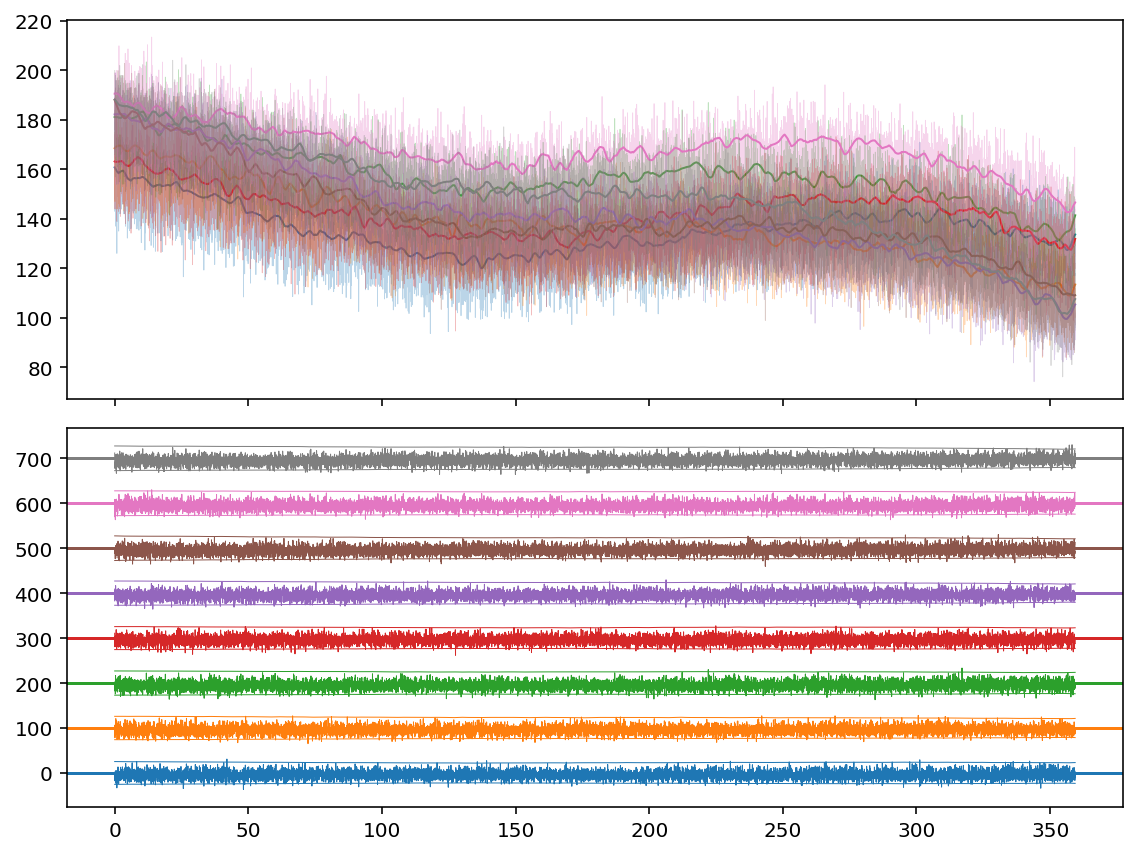

In [157]:
# %%capture
plt.close()
fig, axs = plt.subplots(2,1,figsize=(8,6), sharex=True)
ia = 0
for i,j in zip(*np.where(np.all([-7.1<medians, medians<-4], axis=0))):
#     if ia<3:
#         ia += 1
#         continue
# for di,dj in product([-1,0,1],[-1,0,1]):
#     x = m_orig[:,i+di,j+dj]
    x = m_orig[:,i,j]
#     xf = filteredMovie[:,i,j]
    xf = shiftFiltered[:,i,j]
    axs[0].plot(time,x,c="C%i"%ia,lw=.4,alpha = .3)
    axs[0].plot(time,xf,label=ia,c="C%i"%ia,lw=1)
    yoffset = 100*ia
    axs[1].plot(time,x-xf+yoffset,label=ia,c="C%i"%ia,lw=.5)
    axs[1].plot(time,yoffset+2*xf**.5,c="C%i"%ia,lw=.5)
    axs[1].plot(time,yoffset-2*xf**.5,c="C%i"%ia,lw=.5)
    axs[1].axhline(yoffset,color="C%i"%ia)
#     axs[1]
    ia += 1
    if ia>10:
        break
# plt.xlim(time.max()-100,time.max())
fig.tight_layout()

In [159]:
rnsd = runningStd(diffMovie[:,i,j],2*wIron+1)
rnmn = runningAverage(diffMovie[:,i,j],2*wIron+1)

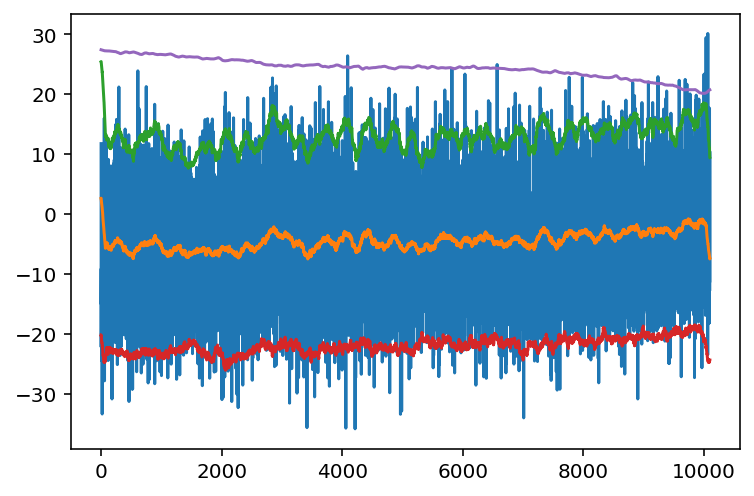

In [160]:
plt.plot(diffMovie[:,i,j])
plt.plot(rnmn)
plt.plot(rnmn+2*rnsd)
plt.plot(rnmn-2*rnsd)
plt.plot(2*xf**.5)

In [700]:
# ts = slice(2800,3200)
# tmp = diffMovie[ts]-diffMovie[ts].min()
# tmp = tmp/tmp.max()*1.3
# movie(np.concatenate([
#     m_orig[ts]/filteredMovie[ts].max(),
#     np.ones_like(m_orig[ts,:2,:]),
#     filteredMovie[ts]/filteredMovie[ts].max(),
#     np.ones_like(m_orig[ts,:2,:]),
#     tmp,
# ],axis=1)).play(magnification=4, fr=100,do_loop=True)

In [164]:
stdFiltered  = shiftFiltered.std(0)
meanFiltered = shiftFiltered.mean(0)

In [165]:
%%capture
cc = shiftFiltered.local_correlations(0,0)

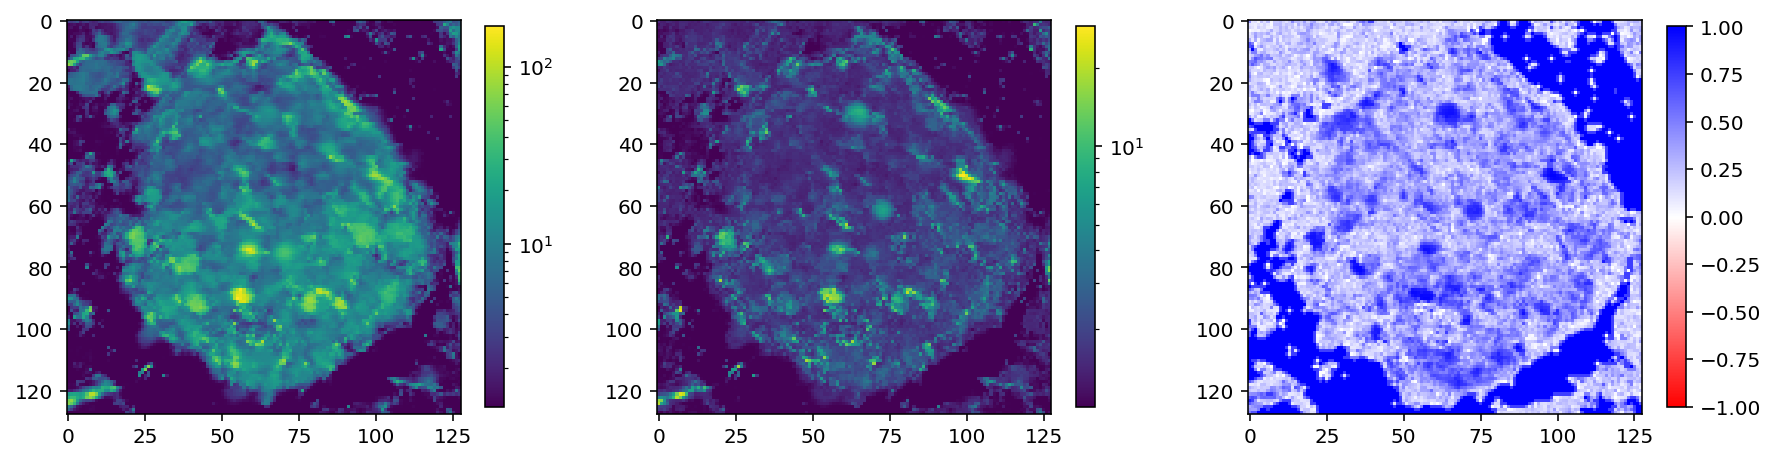

In [166]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
im = axs[0].imshow(meanFiltered, norm=LogNorm())
plt.colorbar(im,ax=axs[0],shrink=.7)
im = axs[1].imshow(1+stdFiltered, norm=LogNorm())
plt.colorbar(im,ax=axs[1],shrink=.7)
try:
    im = axs[2].imshow(cc, cmap="bwr_r", vmin=-1,vmax=1)
    plt.colorbar(im,ax=axs[2],shrink=.7)
except: pass

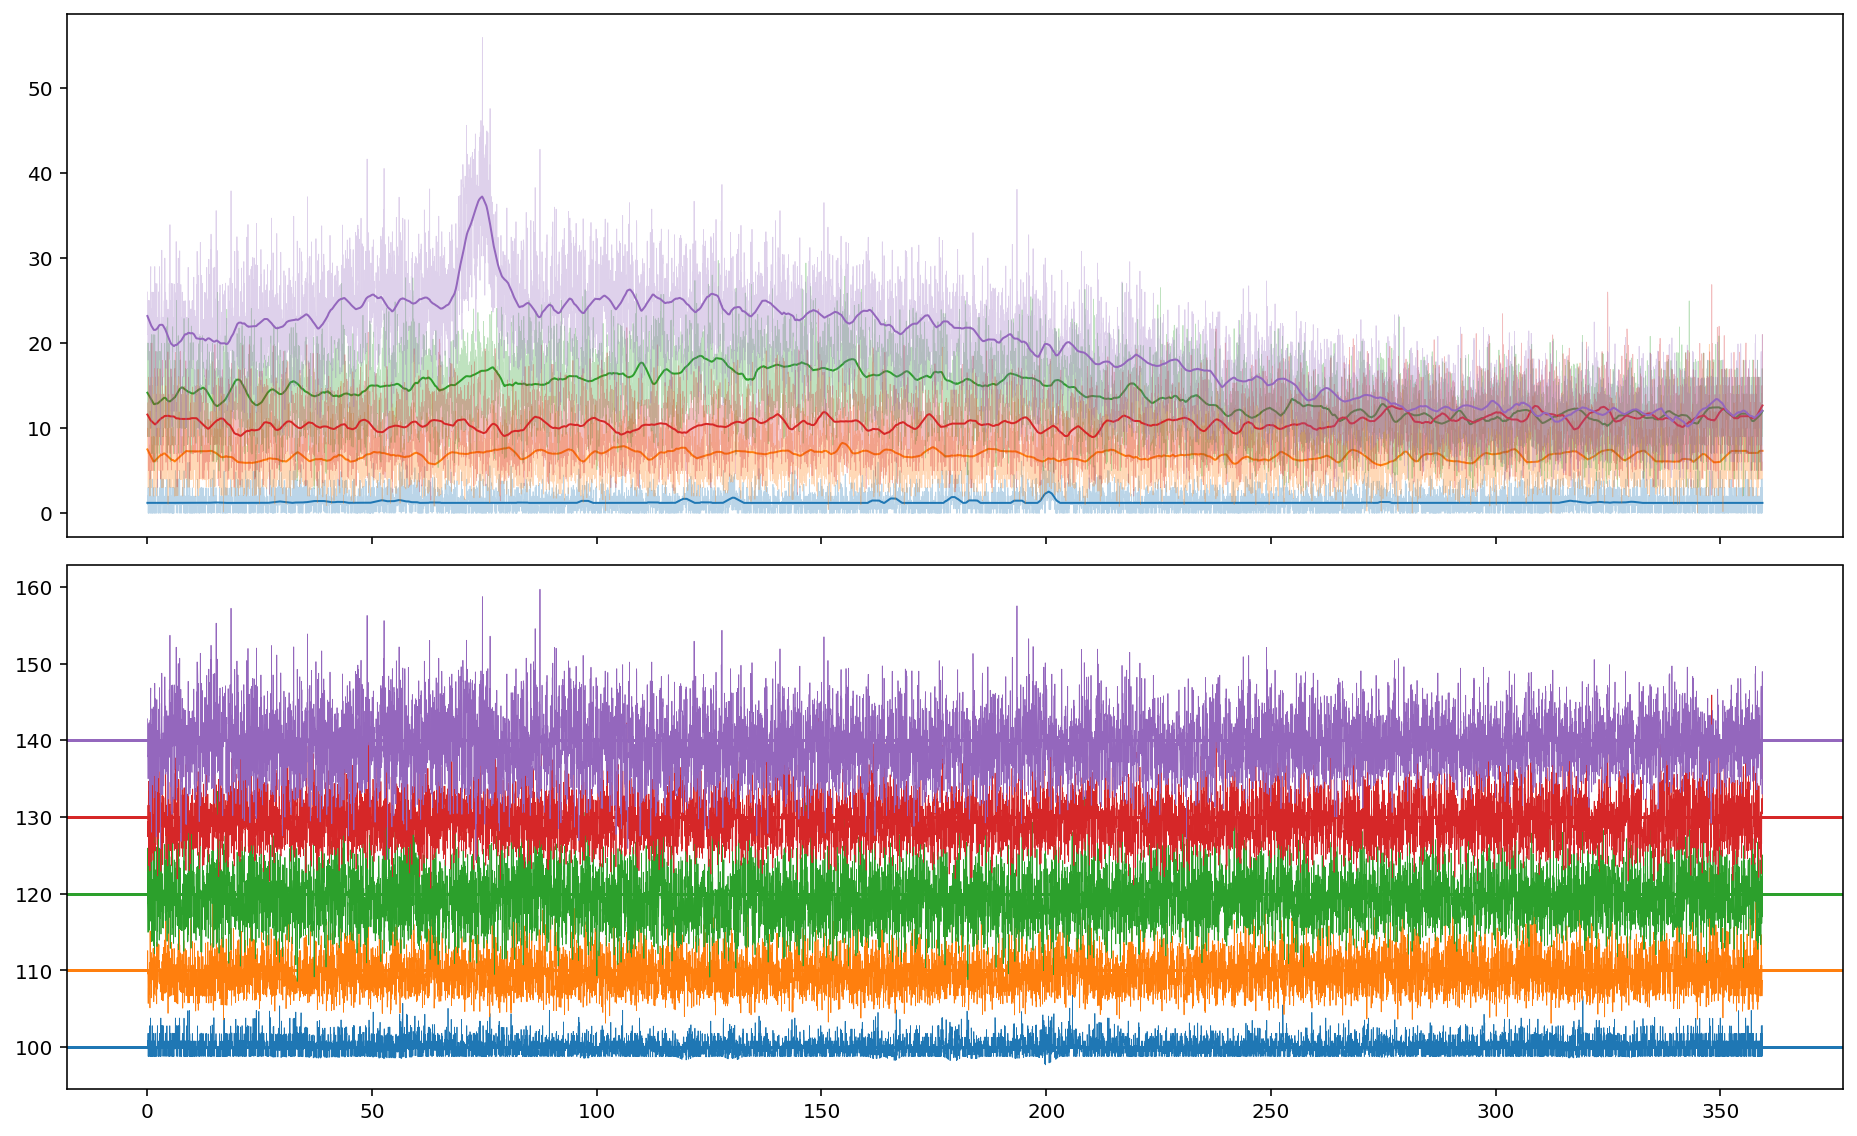

In [167]:
# %%capture
plt.close()
fig, axs = plt.subplots(2,1,figsize=(13,8), sharex=True)
for roi in range(10,15):
    np.random.seed(roi)
    i,j = np.random.choice(stdImg.shape[0],size=2)
    x = m_orig[:,i,j].copy()
    axs[0].plot(time,x,c="C%i"%roi,lw=.4,alpha = .3)
    xf = shiftFiltered[:,i,j].copy()
    axs[0].plot(time,xf,label=roi,c="C%i"%roi,lw=1)
    yoffset = 10*roi
    axs[1].plot(time,x-xf+yoffset,label=roi,c="C%i"%roi,lw=.4)
    axs[1].axhline(yoffset,color="C%i"%roi)
fig.tight_layout()

In [168]:
tmp = np.abs(stdFiltered-3.5)
i,j = np.squeeze(np.where(tmp==tmp.min()))

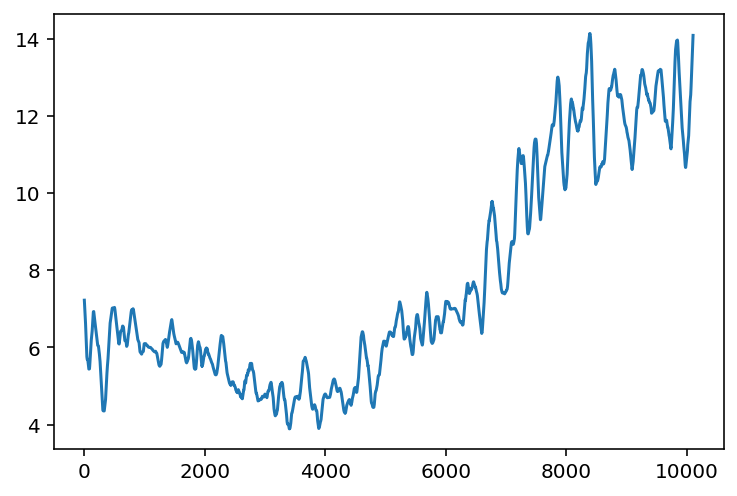

In [169]:
plt.plot(filteredMovie[:,i,j])

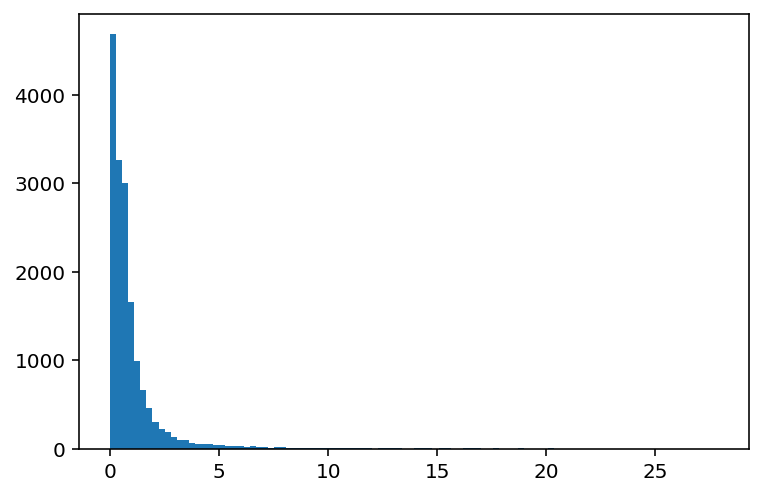

In [170]:
plt.hist(stdFiltered.flatten(),100);

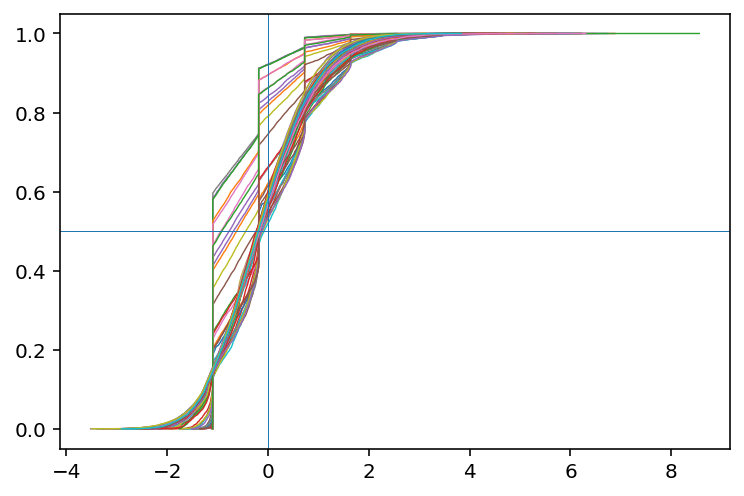

In [171]:
for roi in range(0,100):
    np.random.seed(roi)
    i,j = np.random.choice(stdImg.shape[0],size=2)
    x = diffMovie[:,i,j]/shiftFiltered[:,i,j]**.5
#     sd = 
#     plt.hist(x,1000,lw=.4,histtype="step",density=True,log=True)
    plt.plot(sorted(x),np.linspace(0,1,len(x)),lw=.7,color="C%i"%roi)
plt.axhline(0.5,lw=.5)
plt.axvline(0,lw=.5)

In [172]:
# # %%capture
# plt.close()
# fig, axs = plt.subplots(2,1,figsize=(13,10), sharex=True)
# ia = 0
# for roi in range(200):
#     np.random.seed(roi)
#     i,j = np.random.choice(stdImg.shape[0],size=2)
#     x = m_orig[:,i,j]
#     if sum(x>14)<10: continue
#     xf = filteredMovie[:,i,j].copy()
# #     axs[0].plot(time,x,c="C%i"%roi,lw=.4,alpha = .3)
#     axs[0].plot(time,xf,label=roi,c="C%i"%ia,lw=1)
#     yoffset = 20*ia
#     axs[1].plot(time,x-xf+yoffset,label=roi,c="C%i"%ia,lw=.4)
#     axs[1].axhline(yoffset,color="C%i"%ia)
#     ia += 1
# fig.tight_layout()
# axs[1].set_xlim(0,time.max())

In [174]:
ts = slice(2800,3100)
# diffMovie[ts].play(fr=100,
#          q_max=100,
#          q_min=0,
#          plot_text=True,
#          magnification=3,)

In [212]:
zMovie = (diffMovie[ts]+1)/(shiftFiltered[ts])**.5

In [230]:
n,s = 3,.45
z = np.zeros((5,5))
z[len(z)//2,len(z)//2] = 1
zb  = cv2.GaussianBlur(z,ksize=(n,n),sigmaX=s,sigmaY=s)
zb1 = cv2.GaussianBlur(z,ksize=(n,1),sigmaX=s,sigmaY=s)
with np.printoptions(precision=3, suppress=True):
    print (zb)
    print (zb1)



[[0.    0.    0.    0.    0.   ]
 [0.    0.005 0.062 0.005 0.   ]
 [0.    0.062 0.731 0.062 0.   ]
 [0.    0.005 0.062 0.005 0.   ]
 [0.    0.    0.    0.    0.   ]]
[[0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.   ]
 [0.    0.072 0.855 0.072 0.   ]
 [0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.   ]]


In [227]:
#in time 
nt,st = 5, .55
zMovie = movie(cv2.GaussianBlur(
    zMovie.reshape((len(zMovie),-1)),ksize=(nt,1),sigmaX=st, sigmaY=0
).reshape(zMovie.shape))

In [216]:
# in space
zMovie.gaussian_blur_2D(n,n,s,s);

In [206]:
# zMovie[zMovie<2]=2
# zMovie[zMovie>7]=7

In [217]:
zMovie.play(fr=15,
         q_max=100,
         q_min=0,
         plot_text=True,
         magnification=3,)

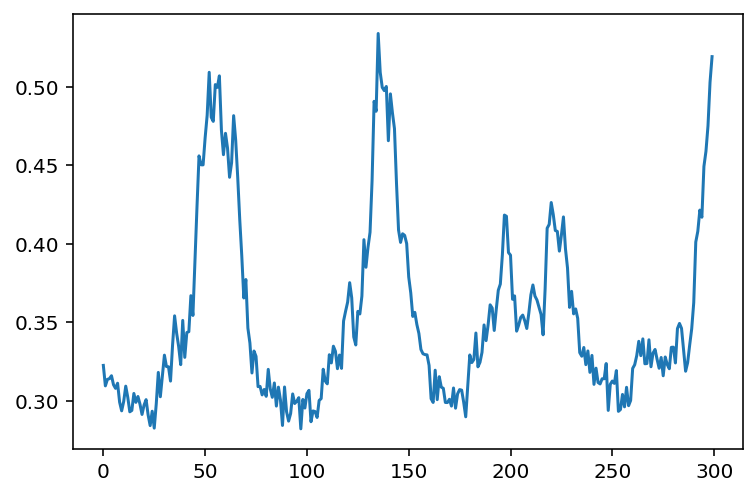

In [218]:
plt.plot(zMovie.mean((1,2)))

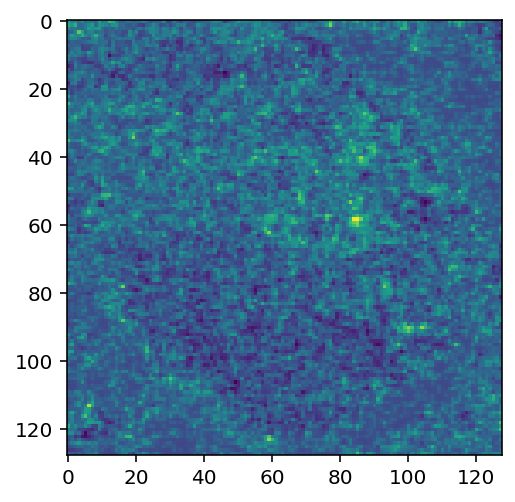

In [219]:
plt.imshow(zMovie[140])

In [519]:
zMovie.min(),zMovie.max()

(movie(-3.51472612), movie(8.61628849))

In [520]:
# tmp = diffMovie.copy()


In [522]:
ts = slice(2000,3000)
diffMovie[ts].play(fr=100,
         q_max=10.,
         q_min=0,
         plot_text=True,
         magnification=3,)

In [506]:
highZ = np.where(zMovie>5)

In [507]:
highZ

(array([    0,     0,     1, ..., 15147, 15150, 15151]),
 array([ 45, 116,   5, ...,  99, 102,   3]),
 array([115, 126,  90, ..., 120, 127,  97]))

In [498]:
t,i,j = np.squeeze(np.where(zMovie==zMovie.max()))

In [504]:
i,j

(6, 123)

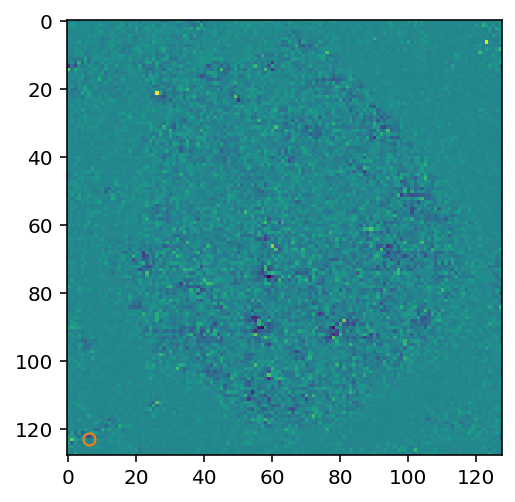

In [503]:
plt.imshow(diffMovie[t])
plt.plot(i,j,"C1o", mfc="none")

In [500]:
diffMovie[t-100:t+100].play(fr=50)

In [481]:
(zMovie>3).sum()

movie(702648)

In [484]:
diffMovie[2000:3000].play(fr=300)

In [525]:
tmp = np.clip(zMovie[2000:3000],3,8)
tmp = tmp-tmp.min()
tmp = 1-tmp/tmp.max()
tmp.play(fr=100,
         q_max=100,
         q_min=0,
         plot_text=True,
         magnification=3,)

### Correct for median/mean

In [174]:
PredictedSigmas = np.zeros_like(meanImg)
PredictedLocs   = np.zeros_like(meanImg)
# for i,j in product(np.arange(metadata.X),np.arange(metadata.Y)):
for i,j in np.array(np.where(np.isfinite(filteredMovie[0]))).T:
    lc,sg = predictLocSd(diffMovie[:,i,j])
#     diffMovie[:,i,j] -= lc
#     filteredMovie[:,i,j] += lc
    PredictedSigmas[i,j] = sg
    PredictedLocs  [i,j] = lc

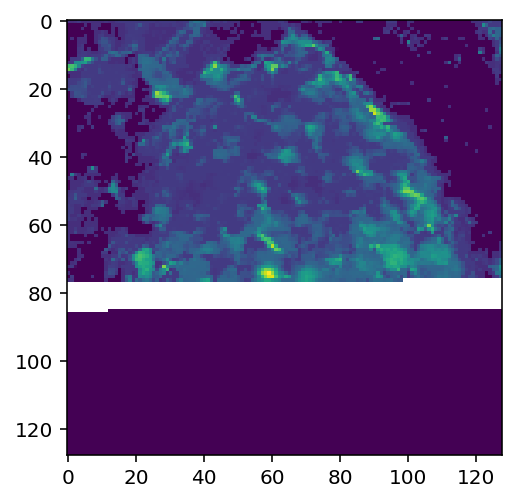

In [175]:
plt.imshow(PredictedLocs)

In [ ]:
filteredMovie.mean(0).f

In [442]:
medians = np.median(diffMovie,axis=0)

In [445]:
filteredMovie += medians
diffMovie     -= medians

In [446]:
diffMovie.max()

movie(62.9608019)

In [447]:
diffMovie.play(fr=200, magnification=4,do_loop=True,q_max=99.8)

In [523]:
filteredMovie.min()

movie(-0.82997036, dtype=float32)

In [358]:
tmp = diffMovie-diffMovie.min()
tmp = np.minimum(tmp,np.percentile(tmp,99.9))

In [363]:
movie(np.concatenate([
    filteredMovie,
    np.ones_like(m_orig[:,:,:2])*m_orig.max(),
    tmp/tmp.max()*filteredMovie.max(),
],axis=2)).play(magnification=3, fr=200,do_loop=True)

In [368]:
tmp = filteredMovie[100:200]
cf = tmp.local_correlations(1,0)

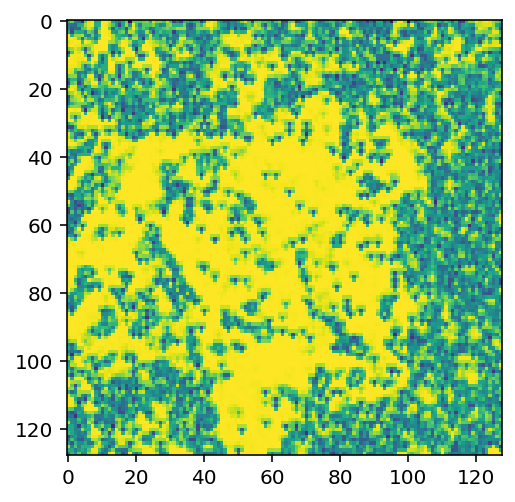

In [369]:
plt.imshow(cf.T)

In [449]:
z_movie = diffMovie/filteredMovie**.5

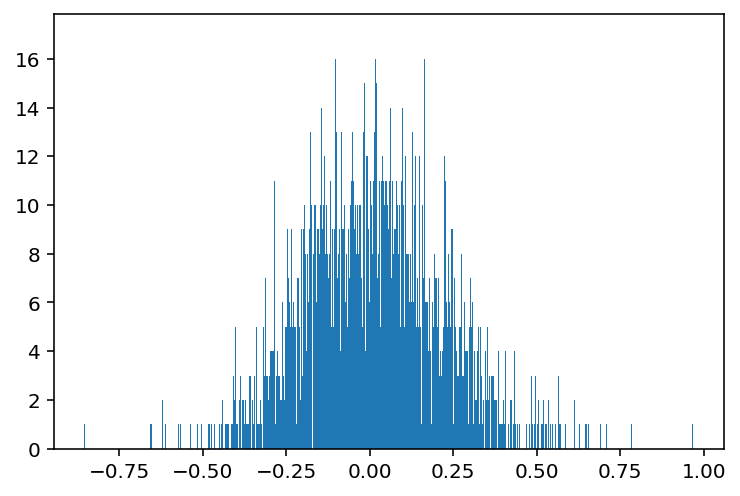

In [450]:
plt.hist(z_movie[:,0,0], 1000);

In [91]:
rnd = 0

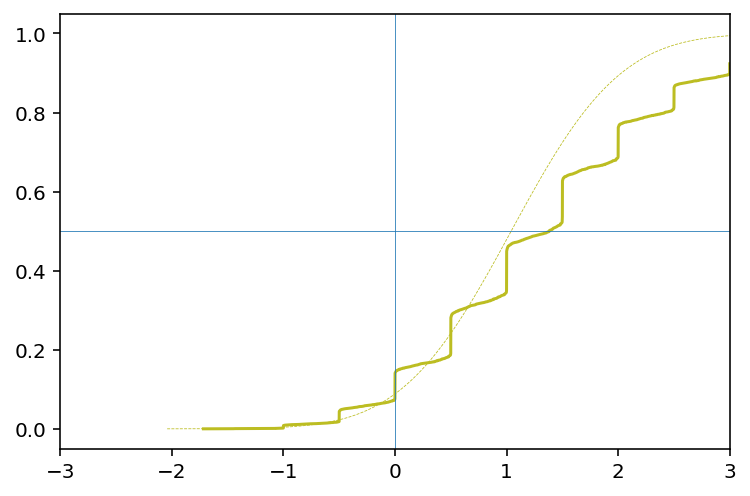

In [94]:
for rnd in range(rnd+1,1000):
    np.random.seed(rnd)
    i,j = np.random.choice(stdImg.shape[0],size=2)
    x = diffMovie[:,i,j]
    lc,sg = predictLocSd(x)
    if np.abs(lc-np.median(x))>.3:
        plt.plot(sorted(x), np.linspace(0,1,len(x)),"C%i"%(rnd%10))
        xr = np.linspace(lc-4*sg,lc+4*sg,1000)
        plt.plot(xr,dst.norm.cdf(xr,loc=lc,scale=sg),"C%i--"%(rnd%10),lw=.4)
#         plt.plot(ps,sfs,".")
        break
#     break
plt.xlim(-3,3)
plt.axhline(.5,lw=.4)
plt.axvline(0,lw=.4)

In [517]:
i,j

(124, 38)

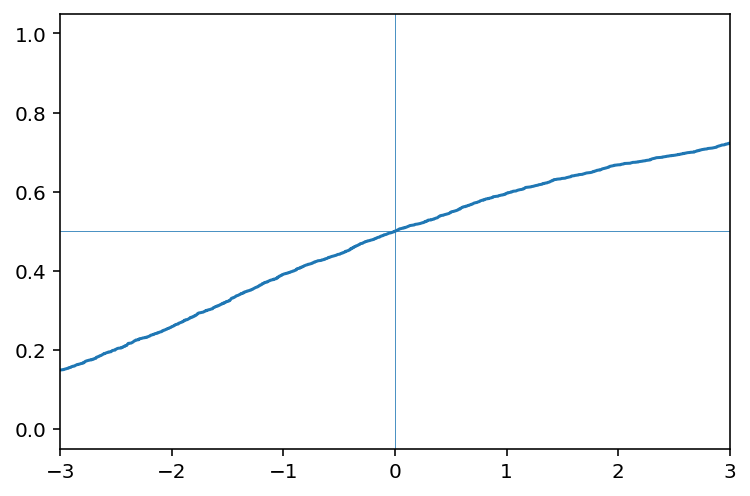

In [522]:
plt.plot(sorted(diffMovie[:,i,j]), np.linspace(0,1,len(x)))
plt.xlim(-3,3)
plt.axhline(.5,lw=.4)
plt.axvline(0,lw=.4)

In [493]:
predictLocSd(diffMovie[:,i,j])

(-0.3615301651859033, 0.8173868698855067)

In [494]:
diffMovie[:,i,j] -= lc

In [495]:
filteredMovie[:,i,j] += lc

In [512]:
[(i,j) for i,j in product(np.arange(3),np.arange(3))]

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [537]:
PredictedSigmas = np.zeros_like(meanImg)
PredictedLocs   = np.zeros_like(meanImg)
for i,j in product(np.arange(metadata.X),np.arange(metadata.Y)):
    lc,sg = predictLocSd(diffMovie[:,i,j])
#     diffMovie[:,i,j] -= lc
#     filteredMovie[:,i,j] += lc
    PredictedSigmas[i,j] = sg
    PredictedLocs  [i,j] = lc

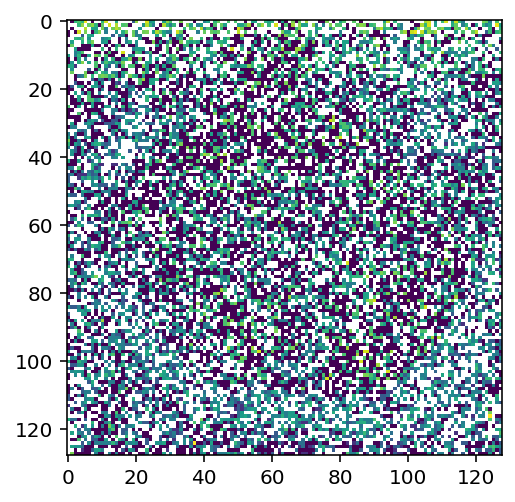

In [538]:
plt.imshow(np.array(PredictedLocs), norm=LogNorm())

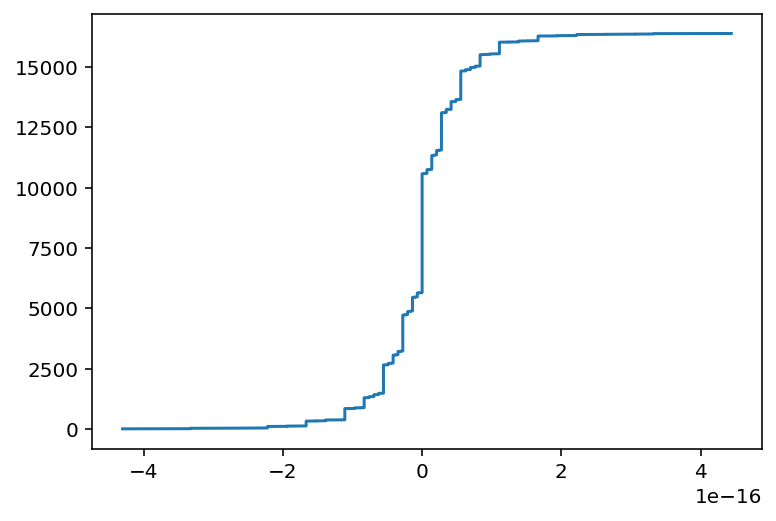

In [539]:
plt.plot(sorted(PredictedLocs.flatten()), np.arange(PredictedLocs.size))

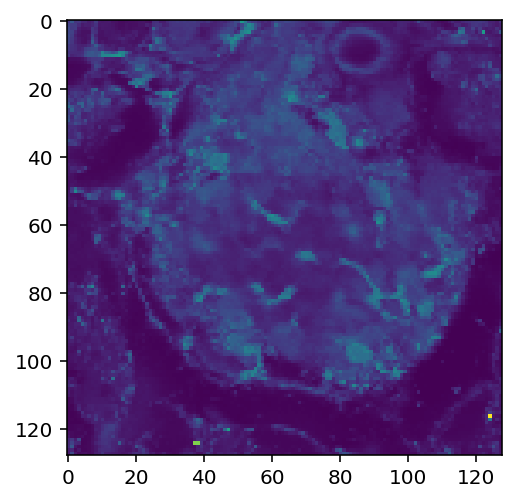

In [542]:
plt.imshow(PredictedSigmas)

In [547]:
# plt.plot(meanImg.flatten()**.5,PredictedSigmas.flatten(),".")
# plt.gca().set_aspect("equal")
# plt.grid()

In [548]:
stdFiltered = filteredMovie.std(0)

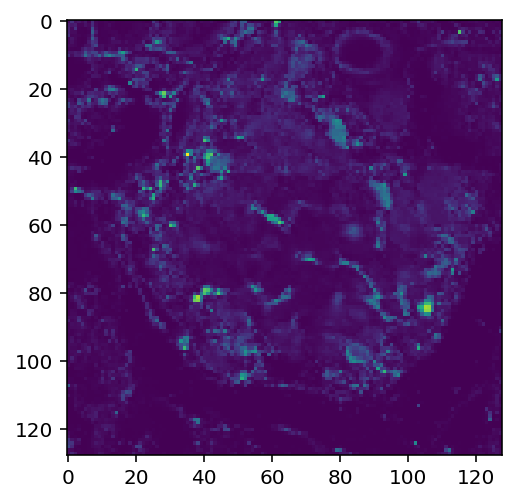

In [550]:
plt.imshow(stdFiltered)

In [553]:
filteredMovie.reshape((-1,meanImg.size)).shape

(2878, 16384)

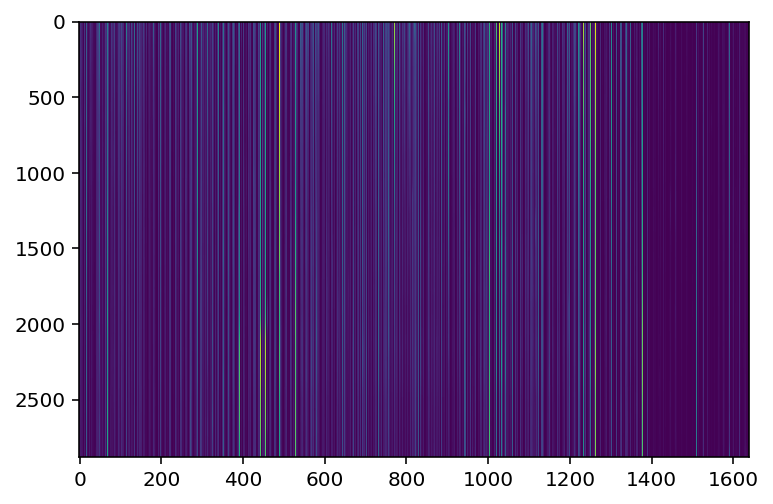

In [552]:
plt.imshow(filteredMovie.reshape((-1,meanImg.size))[:,::10])
plt.gca().set_aspect("auto")

In [ ]:
cc0 = filteredMovie.local_correlations(1,0)
cc1 = diffMovie.local_correlations(1,0)

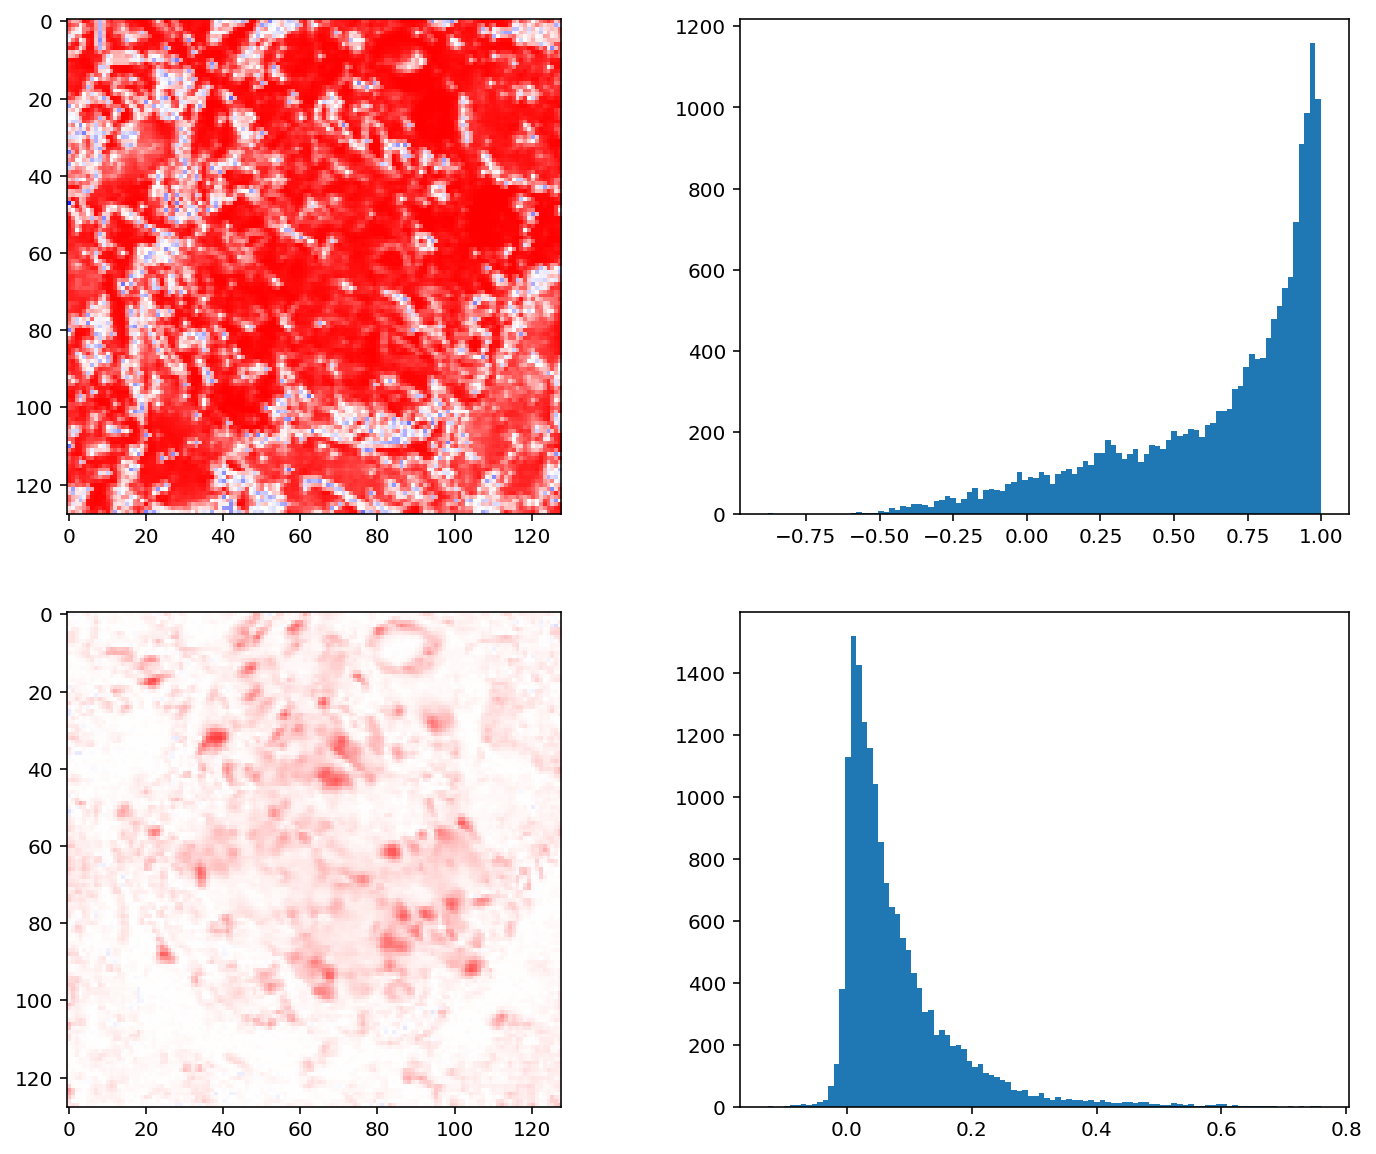

In [561]:
fig, axs = plt.subplots(2,2,figsize=(12,10))
for axx,cc in zip(axs,[cc0,cc1]):
    axx[0].imshow(cc,cmap="bwr",vmin=-1,vmax=1)
    axx[1].hist(cc.flatten(),100);

In [564]:
tmp = np.zeros(meanImg.shape+(3,))

In [568]:
tmp[:,:,0] = cc0
tmp[:,:,1] = cc1
tmp[:,:,2] = -cc0

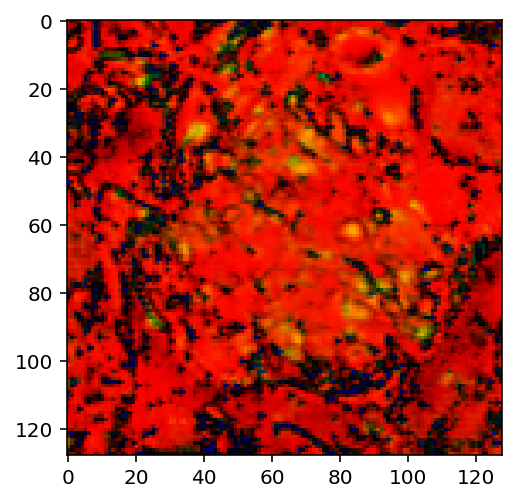

In [569]:
plt.imshow(tmp)

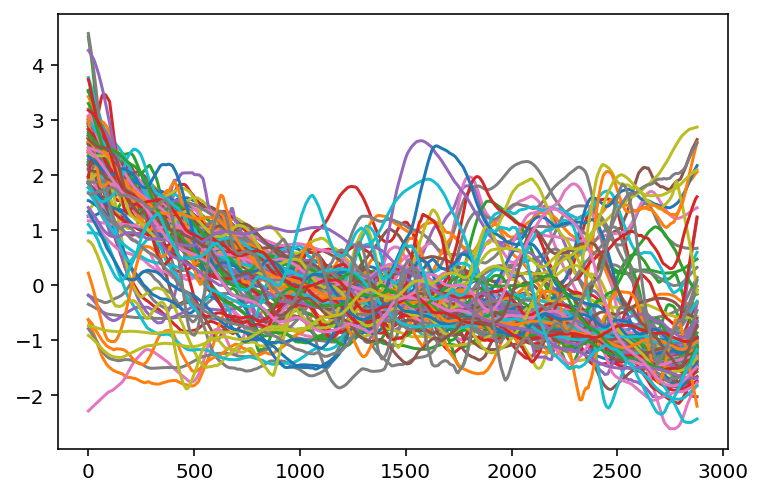

In [575]:
for rnd in range(100):
    np.random.seed(rnd*10)
    i,j = np.random.choice(stdImg.shape[0],size=2)
    x = filteredMovie[:,i,j].copy()
    x = x-x.mean()
    x /= x.std()
    plt.plot(x)

### account for bleaching (separate debleached)

In [718]:
from numeric import decay, decayfit, guessDecayPars

In [710]:
filtMedian = np.median(filteredMovie,(1,2))

In [654]:
filtMean = filteredMovie.mean((1,2))

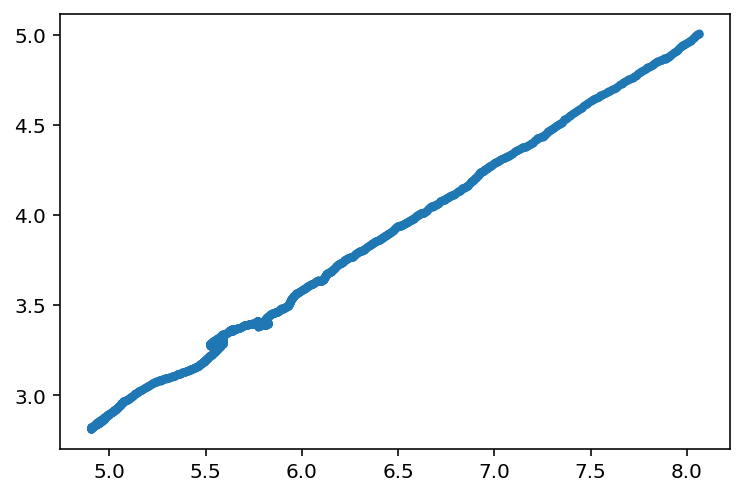

In [711]:
plt.plot(filtMean.flatten(), filtMedian.flatten(), ".")

In [726]:
movie(zb)

movie([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.00163118, 0.03712553, 0.00163118,
        0.        , 0.        ],
       [0.        , 0.        , 0.03712553, 0.84497315, 0.03712553,
        0.        , 0.        ],
       [0.        , 0.        , 0.00163118, 0.03712553, 0.00163118,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [724]:
m_blurred.gaussian_blur_2D(n,n,s,s)

NameError: name 'gaussian_blur_2D' is not defined

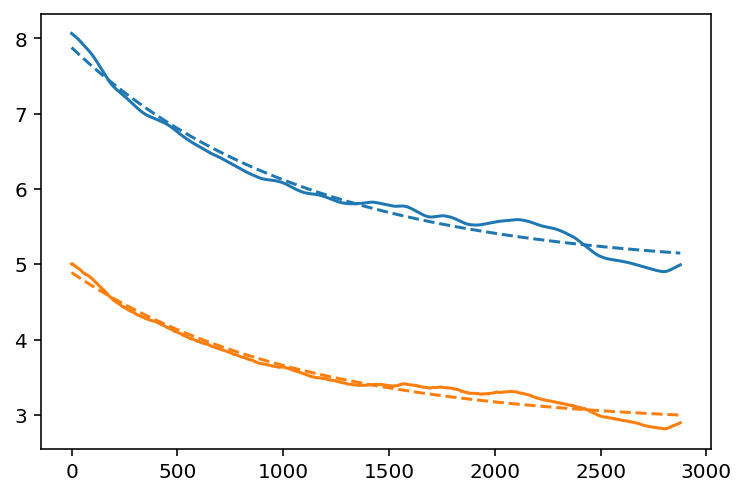

In [713]:
for x in [filtMean,filtMedian]:
    c = plt.plot(x)[0].get_color()
    plt.plot(decayfit(x),"--",c=c)

In [752]:
decFit = decayfit(filtMedian)

In [753]:
decFit = decFit/np.linalg.norm(decFit)

In [754]:
x = filteredMovie[:,10,100]

In [755]:
w = x.dot(decFit)#/np.linalg.norm(decFit)**2

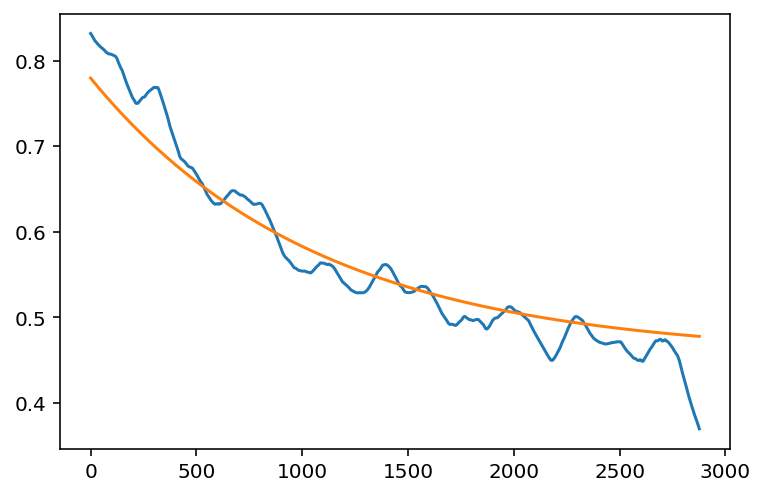

In [756]:
plt.plot(x)
plt.plot(w*decFit)

In [839]:
bleachingMovie = np.zeros_like(filteredMovie)
for i,j in product(range(meanImg.shape[0]),range(meanImg.shape[1])):
    bleachingMovie[:,i,j] = filteredMovie[:,i,j].dot(decFit) * decFit

In [840]:
# bleachingMovie[::10].play(fr=100,magnification=3,do_loop=True)

In [841]:
debleachedMovie = filteredMovie-bleachingMovie

In [842]:
# debleachedMovie[::10].play(fr=100,magnification=3,do_loop=True)

In [843]:
tmp = movie(np.zeros(debleachedMovie.shape+(3,)))

In [844]:
tmp[:,:,:,0] = np.maximum(0,-debleachedMovie)
# tmp[:,:,:,1] = debleachedMovie.max()
tmp[:,:,:,2] = np.maximum(0, debleachedMovie)

In [845]:
tmp[::5].play(fr=500, magnification=4,do_loop=True)

In [827]:
debleachedMovie[::10].play(fr=400,magnification=4,do_loop=True)

In [850]:
from collections import OrderedDict

In [ ]:
n = 5
cc = OrderedDict()

In [855]:
for s in [.1,.2,.3,.4,.5,.6,.7,.8]:
    if s in cc: continue
    cc[s] = movie(cv2.GaussianBlur(debleachedMovie, (n, n), s,s)).local_correlations(1,0)

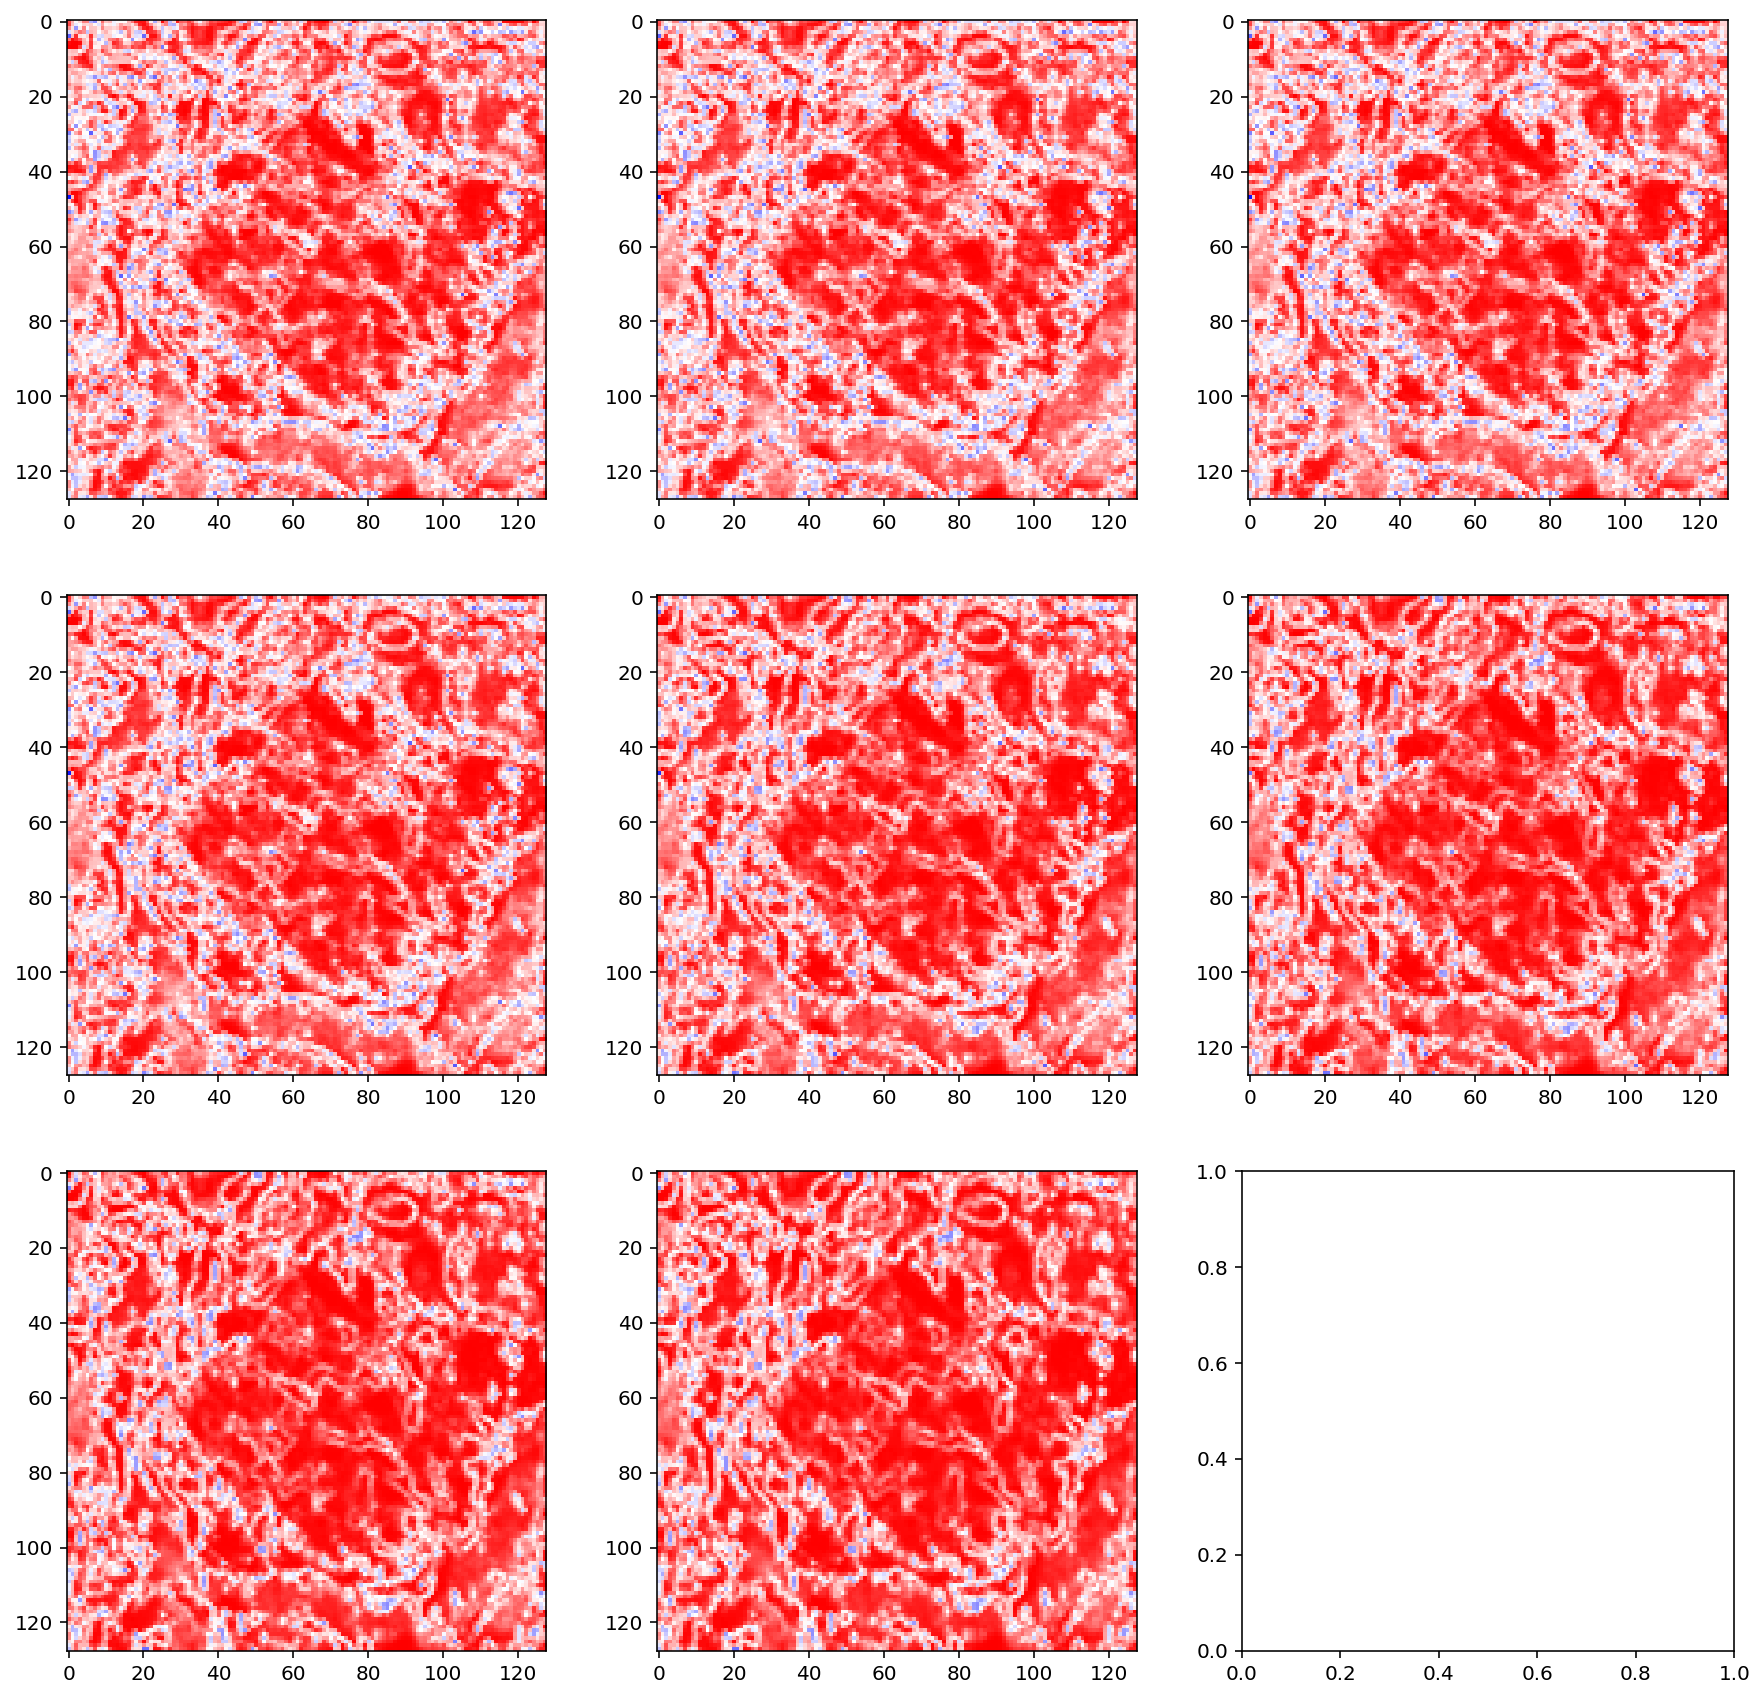

In [901]:
fig, axs = plt.subplots(3,3, figsize=(15,15))
for ax,k in zip(axs.flat,sorted(cc)):
    ax.imshow(cc[k],cmap="bwr",vmin=-1,vmax=1)

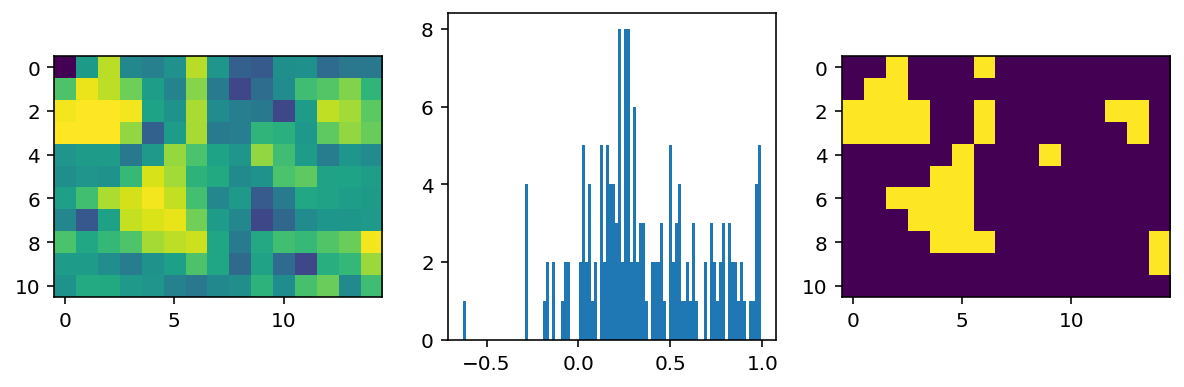

In [902]:
ioff, joff = 4,0
c = cc[.1][ioff:15,joff:15]
fig, axs = plt.subplots(1,3,figsize=(10,3))
axs[0].imshow(c)
axs[1].hist(c.flatten(),100)
axs[2].imshow(c>.7)

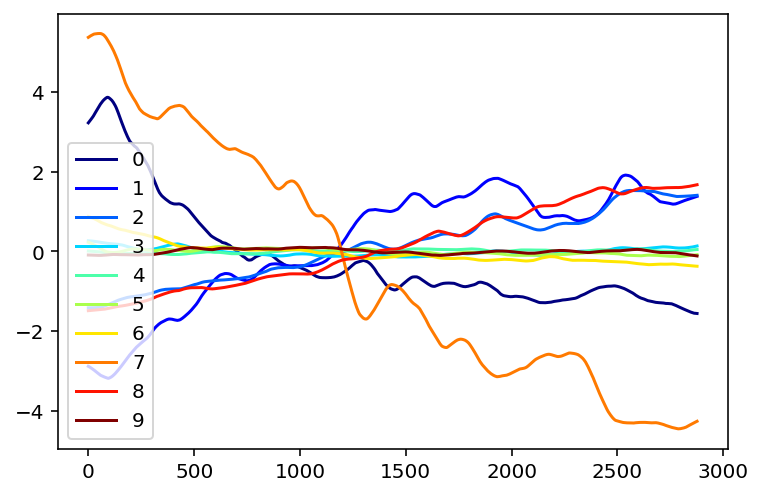

In [900]:
js = np.arange(10)
for j in js:
    x = debleachedMovie[:,ioff,j]
    plt.plot(x, c=plt.cm.jet(j/js.max()),label=j)
plt.legend()

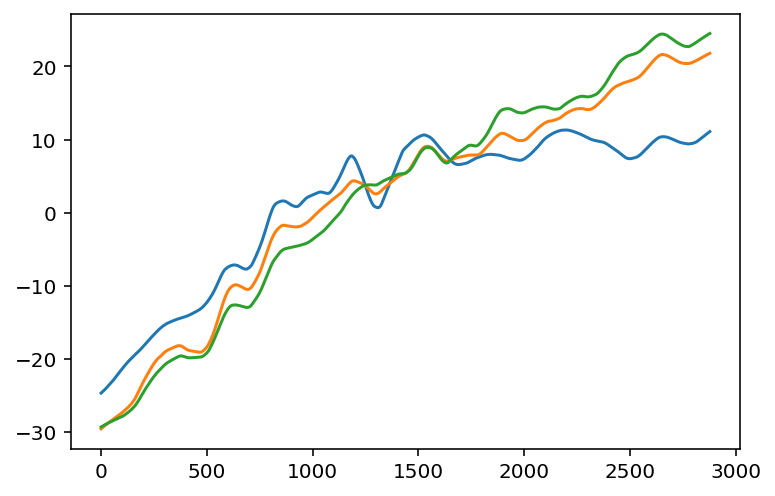

In [866]:
for i,j in [(0,0),(0,1),(0,2)]:
    i += 10
    j += 10
    plt.plot(debleachedMovie[:,i,j])

In [894]:
# plt.imshow(np.diff(debleachedMovie,0).local_correlations(1,0))
# plt.imshow(debleachedMovie.local_correlations(1,0))

In [ ]:
plt.imshow(diffMovie.)

In [ ]:
deca

### analyse fast (for a patch)

### analyse fast (for all?)

In [1218]:
filteredMovie.shape

(2878, 128, 128)

In [1219]:
# choose subset of frames within which the background is assumed not to change
del ts

In [1220]:
del meanImg,stdImg

In [1221]:
expSDall = filteredMovie**.5/tWin

In [1227]:
n,s = 3,.45

z = np.zeros((7,7))
z[len(z)//2,len(z)//2] = 1
zb = cv2.GaussianBlur(z,ksize=(n,n),sigmaX=s,sigmaY=s)

with np.printoptions(precision=3, suppress=True):
    print (zb)


[[0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.005 0.062 0.005 0.    0.   ]
 [0.    0.    0.062 0.731 0.062 0.    0.   ]
 [0.    0.    0.005 0.062 0.005 0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.   ]]


In [1229]:
snrAll = diffMovie.copy()
snrAll.gaussian_blur_2D(n,n,s,s);
snrAll = snrAll/expSDall

In [1259]:
snrAll.min()

movie(-11.95911636)

In [1236]:
plt.grid?

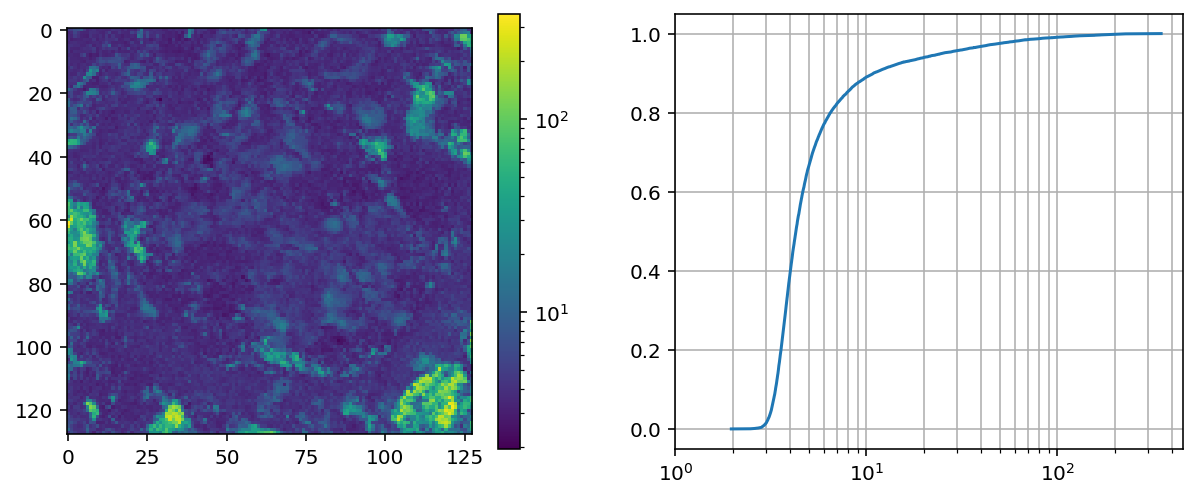

In [1237]:
x = snrAll.max(0) 
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(x, norm=LogNorm())
plt.colorbar()
plt.subplot(122)
# plt.hist(x.flatten(),1000, log=True);
x = x.flatten()
plt.plot(sorted(x), np.linspace(0,1,len(x)))
plt.xscale("log")
plt.xlim(1)
plt.grid(which="both")

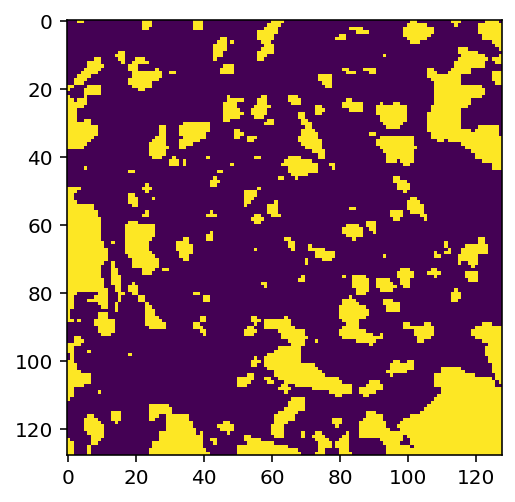

In [1247]:
x = movie(np.array([snrAll.max(0)])).gaussian_blur_2D(3,3,0,0);
plt.imshow(x[0]>6)

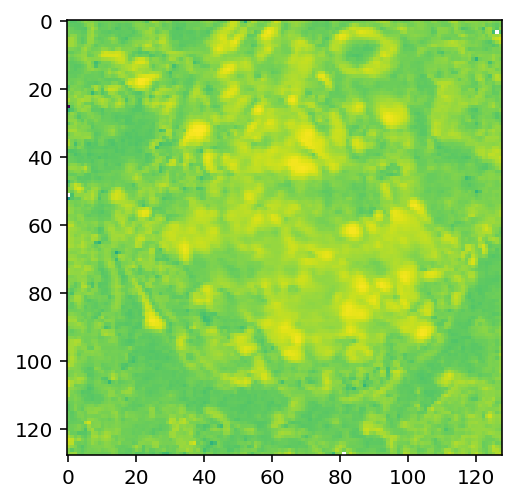

In [1248]:
plt.imshow(snrAll.local_correlations(1,0),norm=LogNorm())

In [1251]:
movie.play?

In [1258]:
tmp = np.clip(snrAll[:],2,8)
tmp = tmp-tmp.min()
tmp = 1-tmp/tmp.max()
tmp.play(fr=100,
         q_max=100,
         q_min=0,
         plot_text=True,
         magnification=3,)

In [1260]:
tmp = diffMovie.copy()

In [1262]:
diffMovie[np.abs(snrAll)<3]=np.nan

In [1264]:
diffMovie.play(fr=100,
         q_max=99.9,
         q_min=0,
         plot_text=True,
         magnification=3,)

In [1253]:
# np.maximum(snrAll[1000:2000],2).play(fr=100,
#                        magnification=3,
#                        q_max=(snr<10).mean()*100,
#                        do_loop=True,
#                        plot_text=True
#                       )

In [1071]:
# plt.plot(meanImg.flatten()**.5,stdImg.flatten(),".",alpha =.4)
# plt.yscale("symlog")

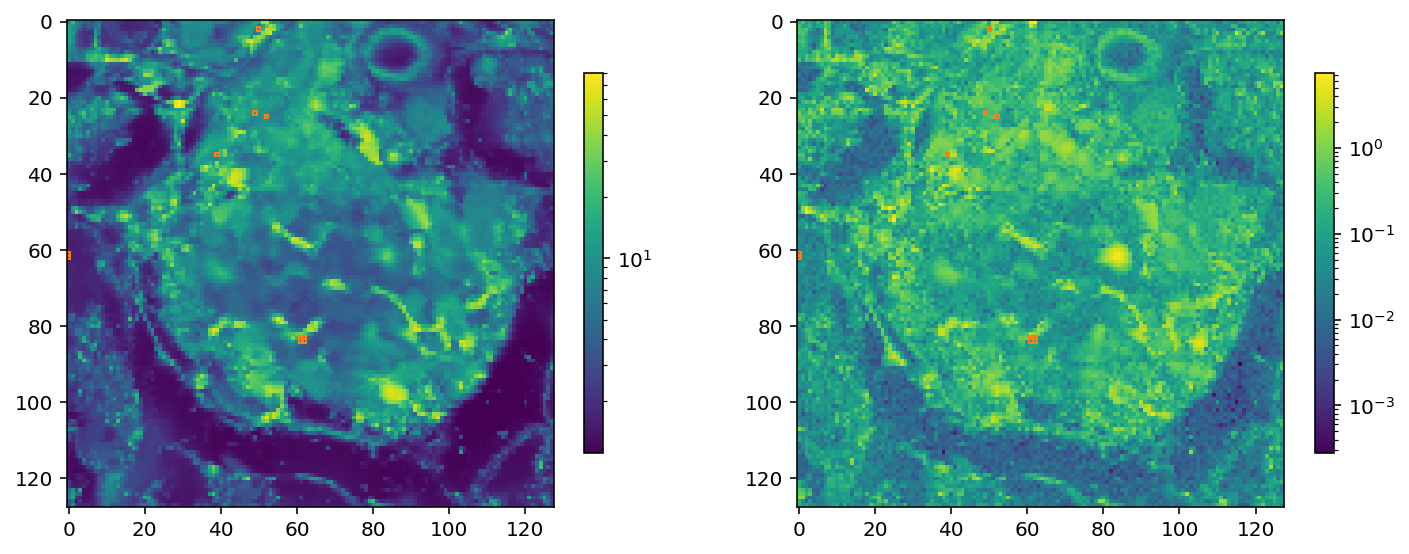

In [996]:
fig, axs = plt.subplots(1,2,figsize=(12,5))
for ax,m in zip(axs,[1+meanImg,stdImg,]):
    im = ax.imshow(m, norm=LogNorm())
    plt.colorbar(im,shrink=.7,ax=ax)
    addRoisToImage(np.array(np.where(stdImg>5)).T,1,ax=ax,label=False)

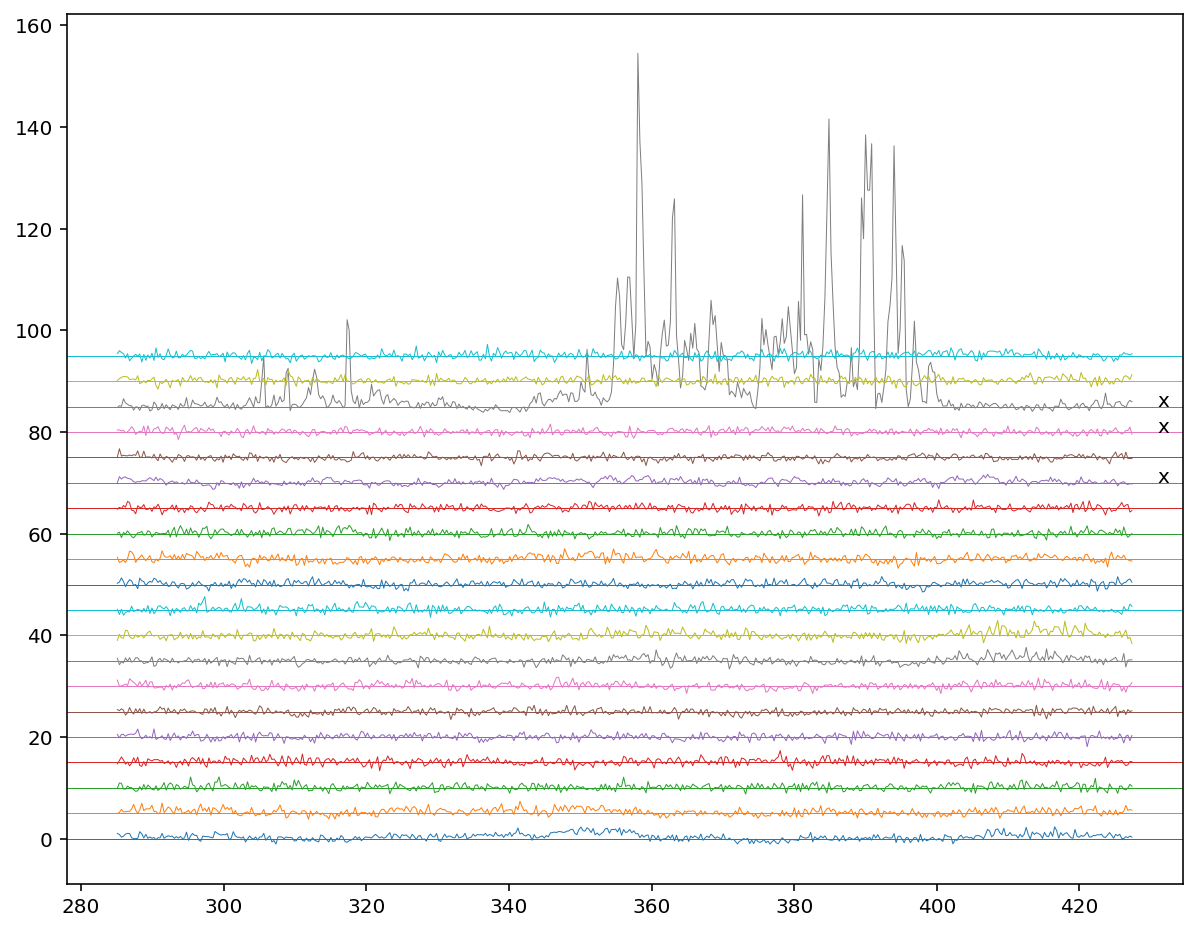

In [1210]:
fig, ax = plt.subplots(1,1,figsize=(10,8), sharex=True)
for roi in range(20):
    yoffset = roi*5
    np.random.seed(roi)
    i,j = np.random.choice(stdImg.shape[0],size=2)
    x = snr[:,i,j]
    c = ax.plot(time[ts],x+yoffset,c="C%i"%roi,lw=.5)[0].get_color()
    ax.axhline(yoffset,color=c,lw=.5)
    
    ## autocorr
    tr = np.arange(1,7)
    y, ye = autocorr(x,tr,5)
    ax.text(plt.xlim()[1],yoffset,"  " if np.sum(np.abs(y/ye)>3) == 0 else "x  ",ha="right")

In [1034]:
# # xr = np.linspace(meanImg.min()**.5,meanImg.max()**.5)
# xr = np.linspace(meanImg.min(),meanImg.max())
# plt.plot(meanImg.flatten(),estSd.flatten()**2,"C3o",mfc="none")
# plt.plot(xr,xr/tWin**2)
# plt.yscale("log")
# plt.xscale("log")

### Try PCA and ICA

In [602]:
@jit
def propose_filter(current, scale):
    dw = scale*np.random.normal(size=len(current))
    new = current+dw
    new = new/np.sum(new**2)**.5
    return new
@jit
def optF(data, fltr):
    return -np.log(np.cosh(data.dot(fltr))).mean()
@jit
def ICAsearch(XT, optF):
    w = np.random.normal(size=len(XT[0]))
    w = w/np.sum(w**2)**.5
    ws = [w]
    fs = [optF(XT,w)]
    rej = 0
    scale = .01
    while True:
        new  = propose_filter(ws[-1], scale)
        fnew = optF(XT,new)
        if fnew>fs[-1]:
            ws += [ new]
            fs += [fnew]
            rej = 0
        else:
            rej += 1
        if rej>1 and rej%1000==0:
            scale = scale/2
        if rej>10000:
            break
    return ws[-1], fs
def myPCA(data):
    '''
    Input:  2D numpy array where rows are observations
    Output: a tuple Eigenvalues, Eigenvetors
    '''
    from scipy import linalg as la
    C = np.cov(data, rowvar=False)
    vals, vecs = la.eigh(C)
    vals = vals[::-1]
    vecs = vecs.T[::-1]
    datamean = data.mean(axis=0)
    for i in range(len(vals)):
        if datamean.dot(vecs[i])<0:
            vecs[i] = -vecs[i]
    return vals, vecs

In [736]:
ICAX = rebin(filteredMovie.reshape((-1,meanImg.size)),1).T
ICAX.shape

(16384, 2878)

In [737]:
%%time
vals, vects = myPCA(ICAX)

CPU times: user 12.8 s, sys: 183 ms, total: 13 s
Wall time: 12.9 s


In [ ]:
ws = vects[0] for c in ICAX

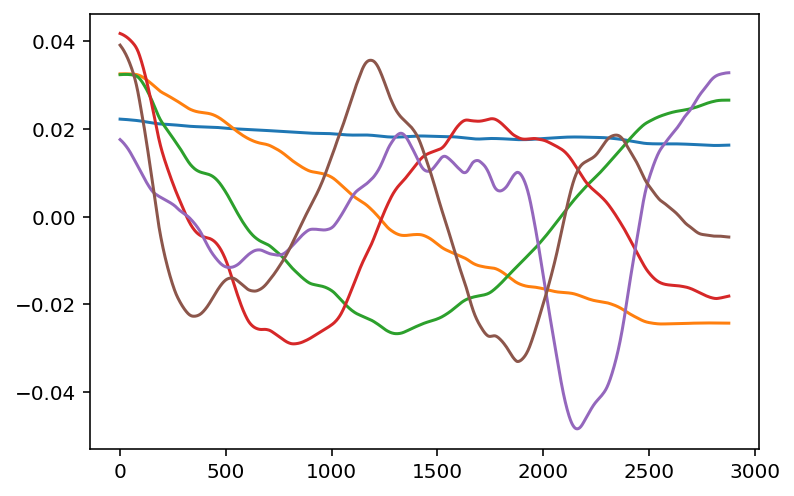

In [738]:
plt.plot(vects[:6].T)

In [739]:
xx = np.array([[x.dot(vects[i]) for x in ICAX] for i in range(1)])

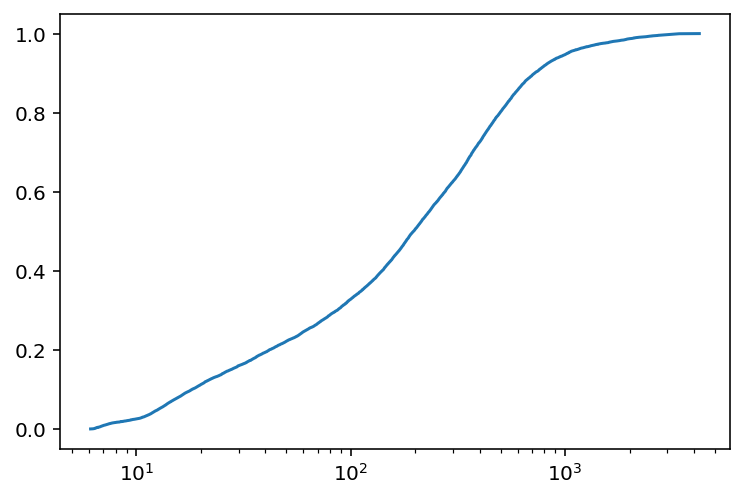

In [740]:
# plt.hist(xx,100)
for x in xx:
    xxx = x[::1]
    plt.plot(sorted(xxx), np.linspace(0,1,len(xxx)))
plt.xscale("log")

In [744]:
ws = xx[0]

In [749]:
bleachingMovie = np.array([w*vects[0][:] for w in ws]).T
bleachingMovie = bleachingMovie.reshape((-1,)+meanImg.shape)
bleachingMovie.shape
# .reshape()

(2878, 128, 128)

/Users/srdjan/Documents/Physio_Ca/functions/numeric.py:14: RuntimeWarning: divide by zero encountered in log
  y  = np.log(y-b0)


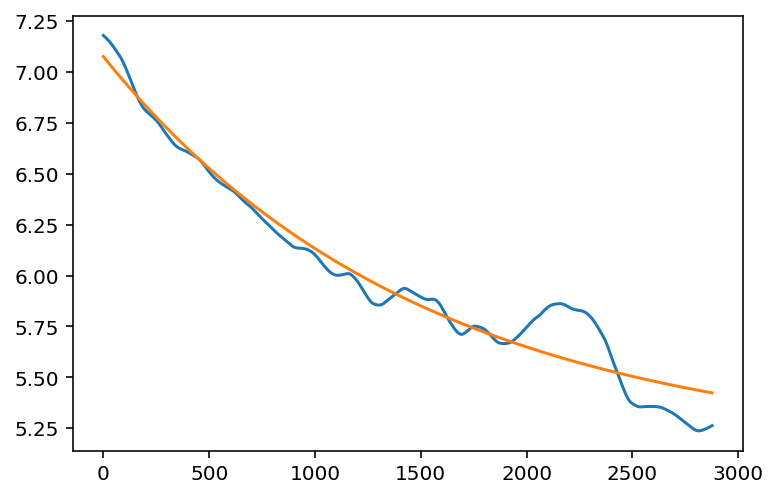

In [751]:
x = bleachingMovie.mean((1,2))
plt.plot(x)
plt.plot(decayfit(x))

In [743]:
detrendedMovie = filteredMovie-movie(.reshape(meanImg.shape))

In [701]:
pd.DataFrame(xx.T).shape

(16384, 5)

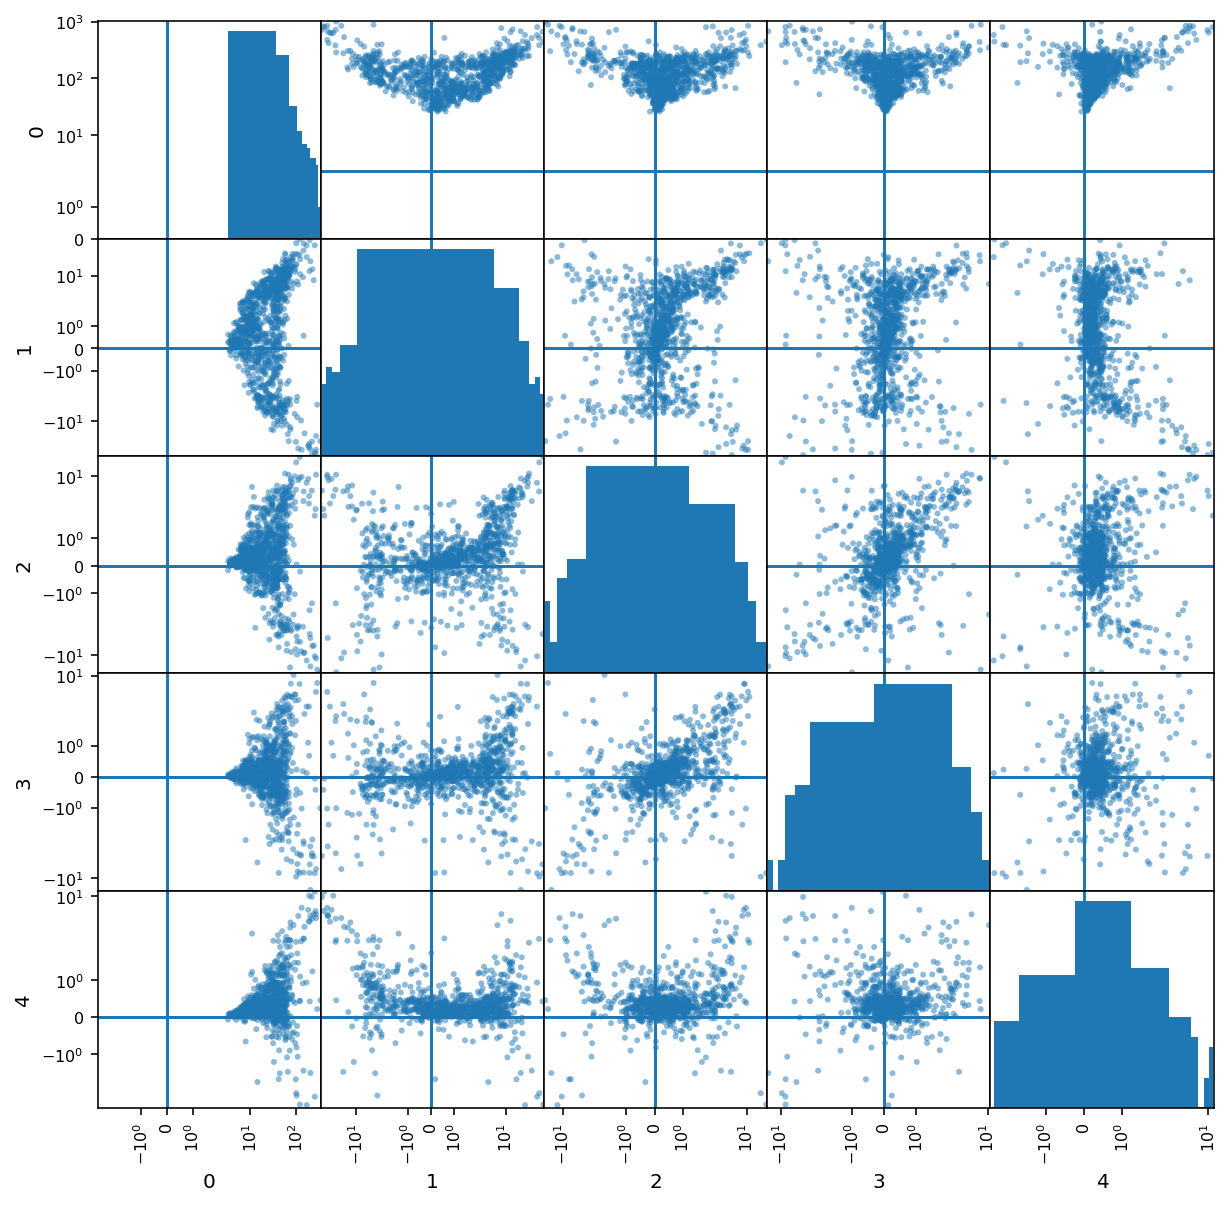

In [709]:
axs = pd.plotting.scatter_matrix(pd.DataFrame(xx[:,:1000].T), figsize=(10,10));
for ax in axs.flat:
    ax.axhline(0)
    ax.axvline(0)
    ax.set_xscale("symlog")
    ax.set_yscale("symlog")

In [698]:
xx.shape

(5, 16384)

In [681]:
xx.shape

(16384,)

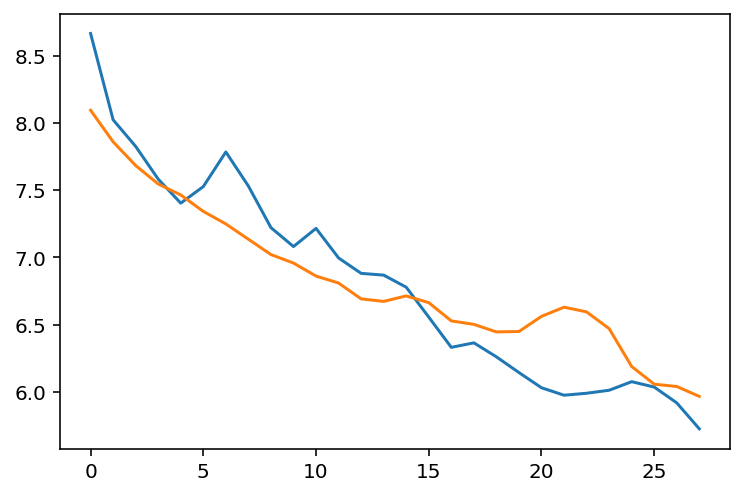

In [653]:
plt.plot(x)
plt.plot(x.dot(vects[0])*vects[0])

<BarContainer object of 28 artists>

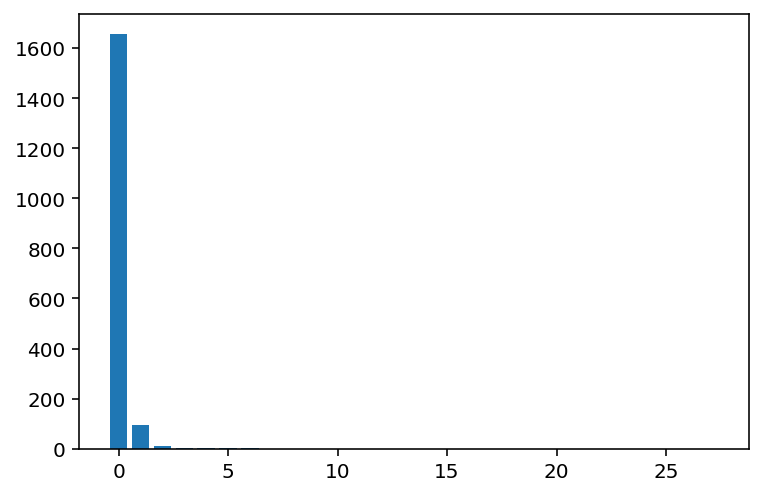

In [641]:
plt.bar(np.arange(len(vals)),vals)

In [636]:
# XT = ICAX.dot(vects.T).dot(np.diag(vals**(-0.5))).dot(vects)
# print (XT.shape)
# del vals, vects, XT

In [637]:
ICA_Searches = {'filter':[],'convergence':[]}

In [627]:
# %%capture
for i in range(1):
    w_filter, f = ICAsearch(XT,optF)
    ICA_Searches['filter']      += [w_filter]
    ICA_Searches['convergence'] += [f]

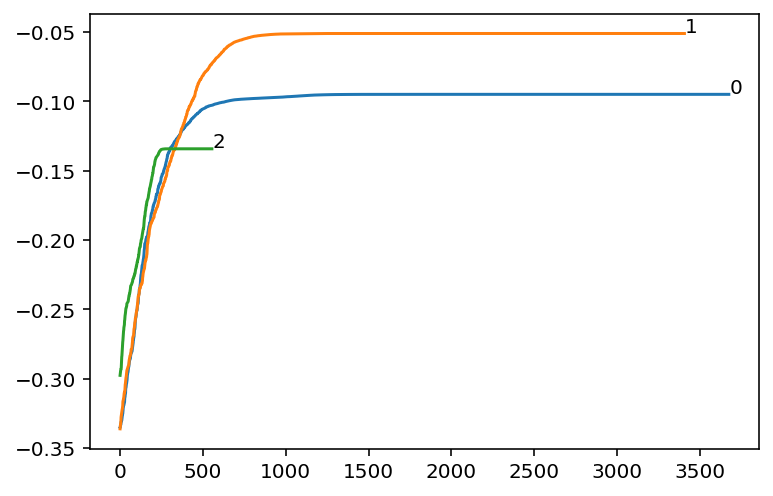

In [628]:
for j,f in enumerate(ICA_Searches['convergence']):
    plt.plot(f, label=str(j))
    plt.text(len(f)+1,f[-1]+.001,str(j))

In [629]:
ff = np.array(ICA_Searches['filter'])

In [630]:
plt.imshow(ff, cmap="bwr",vmin=-np.abs(ff).max(),vmax=np.abs(ff).max())
plt.gca().set_aspect("auto")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

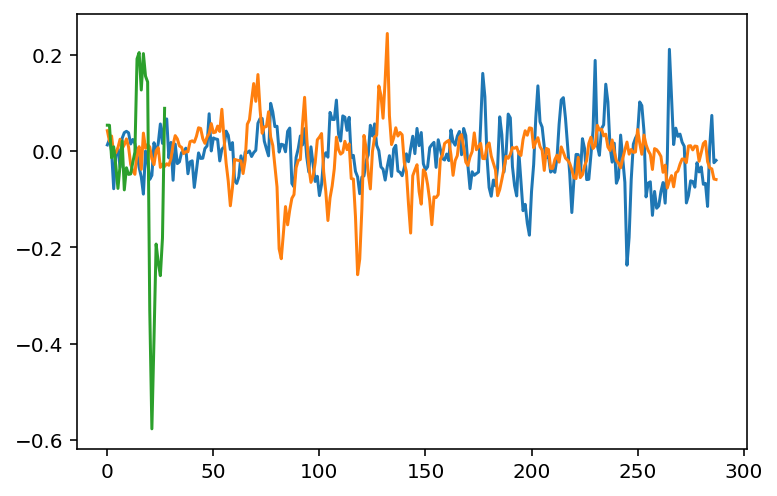

In [632]:
for x in ff:
    plt.plot(x)